#### 1. 数据清洗
* 提取事故的时间特征
* 根据数据完备性筛选数据
* 删除多余字段，保留有效特征

#### 2. 单字段研究
* 企业地点分布
* 事故基本起数
* 触犯公司（工种）红线
* 事故损失
    * 伤亡人数
    * 直接经济损失
    * 经济损失
    * 实际损失工时
* 事故时间序列特征
    * 每年的事故量
    * 每季度的事故量
    * 每月的事故量
    * 每（两）小时的事故量
* 业务类型
* 事件级别
* 事故类型
* 作业类型
* 伤害方式
* 受伤部位

#### 3. 多字段对比研究
* 事故部门（事故地点）、肇事者部门和受伤者部门关联 （三字段对比分析）
* 肇事人员涉及班组、施工队和受伤人员涉及班组、施工队关联
* 责任事件与作业许可项目关联
* 肇事人员和受伤人员对比研究
    * 肇事人员单人造成事故、多人造成事故、受伤单人事故和受伤多人事故 （与第一部分的关系）
    * 肇事人员和受伤人员性别、婚姻状况、年龄、文化程度比例
    * 肇事人工种、肇事人用工形式、肇事人本工种工龄、受伤人员工种、受伤人员本工种工龄、受伤人员用工形式
      （就差工龄字段，这里用不到，或许对事故致因分析时候可以使用）
    * 肇事者和受伤者是否为新人、有无船厂工作经验、入职和受教育时间
    
#### 4. 毕业论文工作
* 事故经过
    * 事件简述
    * 事件详述
* 事故致因
    * 直接原因
    * 间接原因
    * 根本原因
* 事故机制和理论研究

## 1. 数据清洗
#### 1.1导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#设置绘图参数
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

#### 1.2加载数据

In [2]:
data = pd.read_excel(r'C:\Users\86177\Desktop\海工事故\事故调查报告列表-中远海重.xls')
data.head()

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人本工种工龄,肇事人入职时间,肇事人接受教育时间,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度
0,1,上海中远海运重工,服务工区,机械伤害,2020-04-21 10:35,2020-04-20,17:30,“海昌”轮,船舶,NaN,...,1,2019-11-08,2019-11-04,男,已婚,新工人,无,起重作业指挥,外包制,初中
1,2,扬州中远海运重工,NaN,内业科物体打击,2020-04-10 08:01,2020-04-06,18:00,T排焊接工场,内场,NaN,...,3,2018-11-08,2018-11-08,男,已婚,老工人,NaN,辅助工,协力制,初中
2,3,大连中远海运川崎,NaN,吊物牵引绳夹具飞出击伤作业者脸部！,2020-04-02 10:00,2020-03-31,16:10,NaN,内场,NaN,...,10,2010-07-01,2010-07-01,男,已婚,老工人,NaN,装配工,合同制,高中、职专、中技
3,4,扬州中远海运重工,NaN,千斤顶坠落险肇,2020-04-02 17:01,2020-03-30,09:20,N937,码头或坞,NaN,...,3,2020-03-28,2020-03-28,男,已婚,新工人,有,装配工,外包制,初中
4,5,扬州中远海运重工,NaN,内业科 104#电磁桥式起重机钢板掉落险肇,2020-04-05 08:32,2020-03-26,10:30,NaN,内场,NaN,...,3,2019-09-24,2019-09-24,女,已婚,老工人,NaN,起重司机,协力制,高中、职专、中技


In [2]:
data = pd.read_excel(r'E:\Ajiao\LiXian\notebook\notebook\事故调查报告列表-中远海重.xls')
data.head()

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人本工种工龄,肇事人入职时间,肇事人接受教育时间,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度
0,1,上海中远海运重工,服务工区,机械伤害,2020-04-21 10:35,2020-04-20,17:30,“海昌”轮,船舶,NaN,...,1,2019-11-08,2019-11-04,男,已婚,新工人,无,起重作业指挥,外包制,初中
1,2,扬州中远海运重工,NaN,内业科物体打击,2020-04-10 08:01,2020-04-06,18:00,T排焊接工场,内场,NaN,...,3,2018-11-08,2018-11-08,男,已婚,老工人,NaN,辅助工,协力制,初中
2,3,大连中远海运川崎,NaN,吊物牵引绳夹具飞出击伤作业者脸部！,2020-04-02 10:00,2020-03-31,16:10,NaN,内场,NaN,...,10,2010-07-01,2010-07-01,男,已婚,老工人,NaN,装配工,合同制,高中、职专、中技
3,4,扬州中远海运重工,NaN,千斤顶坠落险肇,2020-04-02 17:01,2020-03-30,09:20,N937,码头或坞,NaN,...,3,2020-03-28,2020-03-28,男,已婚,新工人,有,装配工,外包制,初中
4,5,扬州中远海运重工,NaN,内业科 104#电磁桥式起重机钢板掉落险肇,2020-04-05 08:32,2020-03-26,10:30,NaN,内场,NaN,...,3,2019-09-24,2019-09-24,女,已婚,老工人,NaN,起重司机,协力制,高中、职专、中技


In [3]:
print('初始数据量:{}条数据'.format(len(data)))

初始数据量:1984条数据


In [4]:
print('数据所有的字段特征如下：')
data.columns

数据所有的字段特征如下：


Index(['序号', '企业名称', '部门', '事件名称', '报告时间', '事件发生日期', '发生时间', '项目名称', '地点选取',
       'IMO number', '业务分类一级', '业务分类二级', '国标', '国际通用标准', '事件级别', '是否责任事件',
       '是否作业许可项目', '受伤人员涉及车间、部门', '受伤人员涉及班组、施工队', '受伤人员姓名', '受伤人员年龄', '受伤人员工龄',
       '受伤人员本工种工龄', '受伤人员入职时间', '受伤人员接受教育时间', '受伤人员性别', '受伤人员婚姻状况',
       '受伤人员是否为新工人', '受伤人员如新工人有无船厂工作经验', '受伤人员工种', '受伤人员用工形式', '受伤人员文化程度',
       '本次事件经济损失（万元）', '其中直接经济损失（万元）', '本次事件损失工作日总数', '损失时间', '实际损失的工作天数',
       '实际损失工时', '事件类别', '伤害方式一级', '伤害方式二级', '作业类型', '受伤部位', 'K1直接原因',
       'K2间接原因', 'k3根本原因', '触犯公司红线', '触犯工种红线', '事件简述', '详细描述', '添加人', '添加时间',
       '肇事人员涉及车间、部门', '肇事人员涉及班组、施工队', '肇事人员姓名', '肇事人年龄', '肇事人工龄', '肇事人本工种工龄',
       '肇事人入职时间', '肇事人接受教育时间', '肇事人性别', '肇事人婚姻状况', '肇事人是否为新工人',
       '肇事人如新工人有无船厂工作经验', '肇事人工种', '肇事人用工形式', '肇事人文化程度'],
      dtype='object')

#### 1.3提取事故时间特征

In [5]:
def get_year_month_day(df,time_col):
    
    '''Extract the year, month, and day of the time field data'''
    
    df[time_col]  = pd.to_datetime(df[time_col])
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month
    df['day'] = df[time_col].dt.day
    return df

In [6]:
data = get_year_month_day(data,'事件发生日期')
print('提取事故时间特征后（增加了年月日特征），所有的字段特征如下：')
data.columns

提取事故时间特征后（增加了年月日特征），所有的字段特征如下：


Index(['序号', '企业名称', '部门', '事件名称', '报告时间', '事件发生日期', '发生时间', '项目名称', '地点选取',
       'IMO number', '业务分类一级', '业务分类二级', '国标', '国际通用标准', '事件级别', '是否责任事件',
       '是否作业许可项目', '受伤人员涉及车间、部门', '受伤人员涉及班组、施工队', '受伤人员姓名', '受伤人员年龄', '受伤人员工龄',
       '受伤人员本工种工龄', '受伤人员入职时间', '受伤人员接受教育时间', '受伤人员性别', '受伤人员婚姻状况',
       '受伤人员是否为新工人', '受伤人员如新工人有无船厂工作经验', '受伤人员工种', '受伤人员用工形式', '受伤人员文化程度',
       '本次事件经济损失（万元）', '其中直接经济损失（万元）', '本次事件损失工作日总数', '损失时间', '实际损失的工作天数',
       '实际损失工时', '事件类别', '伤害方式一级', '伤害方式二级', '作业类型', '受伤部位', 'K1直接原因',
       'K2间接原因', 'k3根本原因', '触犯公司红线', '触犯工种红线', '事件简述', '详细描述', '添加人', '添加时间',
       '肇事人员涉及车间、部门', '肇事人员涉及班组、施工队', '肇事人员姓名', '肇事人年龄', '肇事人工龄', '肇事人本工种工龄',
       '肇事人入职时间', '肇事人接受教育时间', '肇事人性别', '肇事人婚姻状况', '肇事人是否为新工人',
       '肇事人如新工人有无船厂工作经验', '肇事人工种', '肇事人用工形式', '肇事人文化程度', 'year', 'month',
       'day'],
      dtype='object')

#### 1.4根据数据的完备性提取数据

In [7]:
data[data['year']>=2014][data['year']<=2019]
#2014-2019年的数据较为完备

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度,year,month,day
22,23,广东中远海运重工,服务车间,夏安轮脱硫塔吊运翻身落地,2019-12-27 11:20,2019-12-27,11:20,D区2号场地,车间,NaN,...,男,NaN,老工人,NaN,起重作业指挥,劳务制,初中,2019,12,27
23,24,上海中远海运重工,涂装工区,物体打击,2019-12-23 08:47,2019-12-21,13:15,卑尔根,船舶,NaN,...,男,已婚,老工人,NaN,打磨工,外包制,初中,2019,12,21
24,25,启东中远海运海工,分段工区,内业工场行车维保,2019-12-20 10:25,2019-12-20,10:20,NaN,内场,NaN,...,女,NaN,新工人,有,起重司机,外包制,高中、职专、中技,2019,12,20
25,26,舟山中远海运重工,NaN,修涂工区银河队装载机与300T龙门吊高压配电箱 碰撞,NaN,2019-12-19,16:00,NaN,码头或坞,NaN,...,男,NaN,老工人,NaN,其他工种,外包制,NaN,2019,12,19
26,27,上海中远海运重工,船体工区,物体打击,2019-12-14 08:30,2019-12-13,10:05,菠萝地海之桥,内场,NaN,...,男,已婚,老工人,NaN,装配工,外包制,初中,2019,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,1084,广东中远海运重工,船体车间,船体车间代兴富右脚砸伤事件,2014-01-04 11:34,2014-01-04,11:35,NaN,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,4
1084,1085,南通船务,机电车间,“顺峰1#”漏油事件,2014-01-03 10:00,2014-01-03,10:00,顺峰1#,船舶,NaN,...,男,已婚,老工人,NaN,调试人员,外包制,大学本科及以上,2014,1,3
1085,1086,舟山中远海运重工,NaN,搭载工区员工推挤事故,NaN,2014-01-03,21:20,NaN,内场,NaN,...,男,已婚,新工人,有,起重作业指挥,劳务制,高中、职专、中技,2014,1,3
1086,1087,舟山中远海运重工,NaN,触电灼伤事故,NaN,2014-01-03,15:10,NaN,码头或坞,NaN,...,男,已婚,老工人,NaN,管理人员,合同制,大学本科及以上,2014,1,3


In [8]:
data[data['year']<2014].head()
#2014年之前的数据并不是所有的字段特征都进行了数据的统计，比如前五条数据

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度,year,month,day
1088,1089,大连中远海运重工,船体车间,船体车间电磁吊压脚轻伤事故,2013-12-30 21:40,2013-12-30,21:40,NaN,内场,NaN,...,男,已婚,老工人,NaN,起重作业指挥,外包制,初中,2013,12,30
1089,1090,广东中远海运重工,船台工区,船台工区金雕队张九江手背压伤,2013-12-30 11:00,2013-12-30,10:30,N493,内场,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,30
1090,1091,南通船务,船体车间（修）,12月29日陈桥三队季建新左手中指受伤,2013-12-29 14:07,2013-12-29,09:30,希望七号,码头或坞,NaN,...,男,已婚,老工人,NaN,装配工,外包制,初中,2013,12,29
1091,1092,广东中远海运重工,机电工区,机电工区调试员尹维新工伤,2013-12-27 14:06,2013-12-27,14:07,N362轮,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,27
1092,1093,上海船务,船体车间,船体车间刚纪2队焦俊科左侧胫骨下端骨折,2013-12-23 08:30,2013-12-23,08:30,支墩,内场,NaN,...,男,已婚,NaN,NaN,电焊工,外包制,初中,2013,12,23


In [9]:
data[data['year']<2014].tail()
#比如最后5条数据，明显可以看出早期的事故统计工作并没有现在这么详细，有些字段统计很可能是后来加上去的

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度,year,month,day
1979,1980,南通船务,服务车间（修）,涂装车间工人物体打击死亡,2002-03-11 14:45,2002-03-11,01:00,德鲁莎,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,3,11
1980,1981,南通船务,船体车间（修）,2002.2.23船体车间马某高空坠落,2002-02-23 14:35,2002-02-23,14:36,兰博,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002,2,23
1981,1982,南通船务,船体车间（修）,船体车间三工段尤某装配作业死亡,2001-09-14 14:28,2001-09-14,17:00,塔波拉,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,9,14
1982,1983,南通船务,船体车间（修）,2001.7.10船体车间王某叉车致死,2001-07-10 14:20,2001-07-10,14:30,内场,内场,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,7,10
1983,1984,南通船务,船体车间（修）,船体车间周某死亡事故,2001-04-02 14:02,2001-04-02,14:00,瓦西克,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,4,2


In [10]:
data[data['year']>2019].head()
#最新的2020年的数据值统计到了4月份

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度,year,month,day
0,1,上海中远海运重工,服务工区,机械伤害,2020-04-21 10:35,2020-04-20,17:30,“海昌”轮,船舶,NaN,...,男,已婚,新工人,无,起重作业指挥,外包制,初中,2020,4,20
1,2,扬州中远海运重工,NaN,内业科物体打击,2020-04-10 08:01,2020-04-06,18:00,T排焊接工场,内场,NaN,...,男,已婚,老工人,NaN,辅助工,协力制,初中,2020,4,6
2,3,大连中远海运川崎,NaN,吊物牵引绳夹具飞出击伤作业者脸部！,2020-04-02 10:00,2020-03-31,16:10,NaN,内场,NaN,...,男,已婚,老工人,NaN,装配工,合同制,高中、职专、中技,2020,3,31
3,4,扬州中远海运重工,NaN,千斤顶坠落险肇,2020-04-02 17:01,2020-03-30,09:20,N937,码头或坞,NaN,...,男,已婚,新工人,有,装配工,外包制,初中,2020,3,30
4,5,扬州中远海运重工,NaN,内业科 104#电磁桥式起重机钢板掉落险肇,2020-04-05 08:32,2020-03-26,10:30,NaN,内场,NaN,...,女,已婚,老工人,NaN,起重司机,协力制,高中、职专、中技,2020,3,26


In [11]:
#最终选定的数据为：2014-2019年的事故数据
data = data[data['year']>=2014][data['year']<=2019]
data

,序号,企业名称,部门,事件名称,报告时间,事件发生日期,发生时间,项目名称,地点选取,IMO number,...,肇事人性别,肇事人婚姻状况,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,肇事人工种,肇事人用工形式,肇事人文化程度,year,month,day
22,23,广东中远海运重工,服务车间,夏安轮脱硫塔吊运翻身落地,2019-12-27 11:20,2019-12-27,11:20,D区2号场地,车间,NaN,...,男,NaN,老工人,NaN,起重作业指挥,劳务制,初中,2019,12,27
23,24,上海中远海运重工,涂装工区,物体打击,2019-12-23 08:47,2019-12-21,13:15,卑尔根,船舶,NaN,...,男,已婚,老工人,NaN,打磨工,外包制,初中,2019,12,21
24,25,启东中远海运海工,分段工区,内业工场行车维保,2019-12-20 10:25,2019-12-20,10:20,NaN,内场,NaN,...,女,NaN,新工人,有,起重司机,外包制,高中、职专、中技,2019,12,20
25,26,舟山中远海运重工,NaN,修涂工区银河队装载机与300T龙门吊高压配电箱 碰撞,NaN,2019-12-19,16:00,NaN,码头或坞,NaN,...,男,NaN,老工人,NaN,其他工种,外包制,NaN,2019,12,19
26,27,上海中远海运重工,船体工区,物体打击,2019-12-14 08:30,2019-12-13,10:05,菠萝地海之桥,内场,NaN,...,男,已婚,老工人,NaN,装配工,外包制,初中,2019,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,1084,广东中远海运重工,船体车间,船体车间代兴富右脚砸伤事件,2014-01-04 11:34,2014-01-04,11:35,NaN,码头或坞,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1,4
1084,1085,南通船务,机电车间,“顺峰1#”漏油事件,2014-01-03 10:00,2014-01-03,10:00,顺峰1#,船舶,NaN,...,男,已婚,老工人,NaN,调试人员,外包制,大学本科及以上,2014,1,3
1085,1086,舟山中远海运重工,NaN,搭载工区员工推挤事故,NaN,2014-01-03,21:20,NaN,内场,NaN,...,男,已婚,新工人,有,起重作业指挥,劳务制,高中、职专、中技,2014,1,3
1086,1087,舟山中远海运重工,NaN,触电灼伤事故,NaN,2014-01-03,15:10,NaN,码头或坞,NaN,...,男,已婚,老工人,NaN,管理人员,合同制,大学本科及以上,2014,1,3


#### 1.5删除多余字段，保留有效特征

In [12]:
data['hour'] = data['发生时间']
data['time'] = data['事件发生日期']
data.drop(['序号','报告时间','IMO number','受伤人员姓名','本次事件损失工作日总数',
                  '损失时间','实际损失的工作天数','添加人','添加时间','肇事人员姓名'],axis = 1,inplace = True)
#其中损失工作日总数、损失时间、实际损失的工作天数和实际损失工时中，只保留一个实际损失工时，其余的对数据都没有影响

## 2. 单字段研究
#### 2.1企业地点分布

In [13]:
data['企业名称'].value_counts()
#克莱芬：南通中远克莱芬船舶工程有限公司
#南通船务：南通中远海运船务工程有限公司
#上海船务：上海中远船务工程有限公司
#丰昌船务：上海丰昌船务工程有限公司

大连中远海运重工    284
广东中远海运重工    166
舟山中远海运重工    151
启东中远海运海工    146
南通船务        138
扬州中远海运重工     58
南通中远海运川崎     45
上海中远海运重工     33
上海船务         27
大连中远海运川崎     15
丰昌船务          1
克莱芬           1
Name: 企业名称, dtype: int64

In [14]:
data = data.replace({'克莱芬':'南通中远克莱芬船舶工程有限公司',
                      '南通船务':'南通中远海运船务工程有限公司',
                      '上海船务':'上海中远船务工程有限公司',
                      '丰昌船务':'上海丰昌船务工程有限公司',
                      '大连中远海运重工':'大连中远海运重工有限公司',
                      '广东中远海运重工':'广东中远海运重工有限公司',
                      '舟山中远海运重工':'舟山中远海运重工有限公司',
                      '启东中远海运海工':'启东中远海运海洋工程有限公司',
                      '扬州中远海运重工':'扬州中远海运重工有限公司',
                      '南通中远海运川崎':'南通中远海运川崎船舶工程有限公司',
                      '上海中远海运重工':'上海中远海运重工有限公司',
                      '大连中远海运川崎':'大连中远海运川崎船舶工程有限公司'})    
data['企业名称'].value_counts()

大连中远海运重工有限公司        284
广东中远海运重工有限公司        166
舟山中远海运重工有限公司        151
启东中远海运海洋工程有限公司      146
南通中远海运船务工程有限公司      138
扬州中远海运重工有限公司         58
南通中远海运川崎船舶工程有限公司     45
上海中远海运重工有限公司         33
上海中远船务工程有限公司         27
大连中远海运川崎船舶工程有限公司     15
上海丰昌船务工程有限公司          1
南通中远克莱芬船舶工程有限公司       1
Name: 企业名称, dtype: int64

In [15]:
data['企业名称'].value_counts().to_excel(r'C:\Users\86177\Desktop\海工事故\处理数据\company.xlsx')

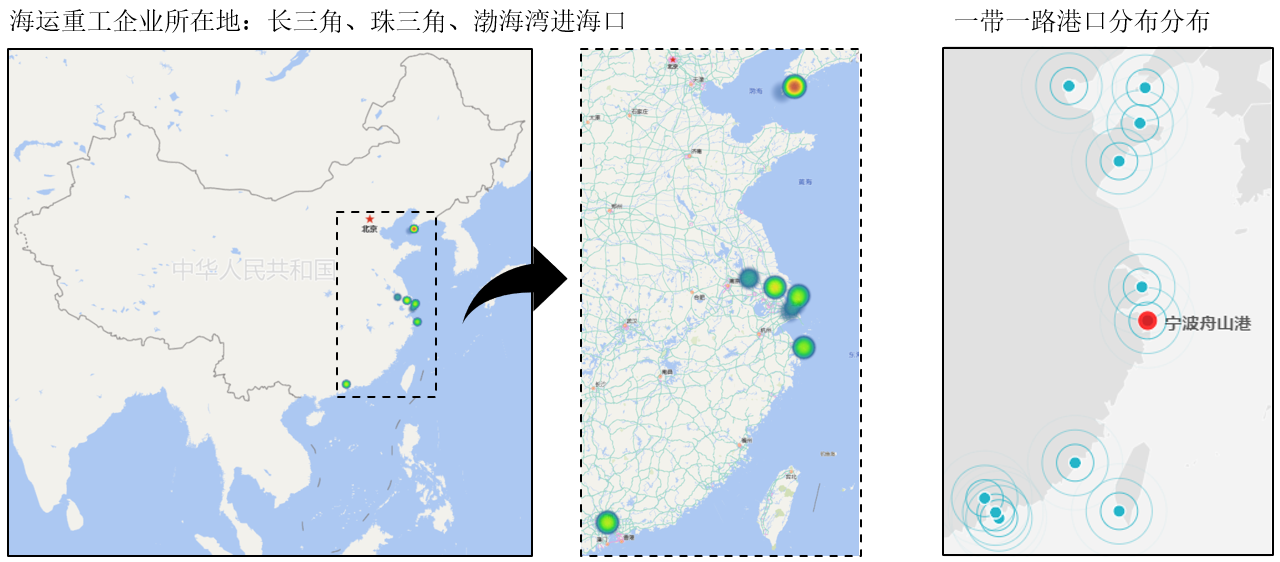

In [16]:
from IPython.display import Image
Image(r'C:\Users\86177\Desktop\海工事故\处理数据\企业分布\mixed.png')

#### 2.2事故基本起数

In [17]:
accident_num = len(data)
print('海运重工修造事故总起数：{}起'.format(accident_num))

海运重工修造事故总起数：1066起


#### 2.3触犯公司（工种）红线

In [18]:
a = [np.nan,np.nan,np.nan,np.nan,np.nan,1]
b = [np.nan,np.nan,np.nan,np.nan,np.nan]
pd.Series(a).unique()

array([nan,  1.])

In [19]:
pd.Series(b).unique()

array([nan])

In [20]:
data['触犯公司红线'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [21]:
data['触犯公司红线'].unique()

array([nan])

In [22]:
data['触犯公司红线'].unique()

array([nan])

In [23]:
print('触犯公司（工种）红线事故起数：{}起'.format(0))

触犯公司（工种）红线事故起数：0起


#### 2.4事故损失

2.4.1 伤亡人数

In [24]:
#伤亡人数，因为统计的每期事故信息都是在Excel一行信息中储存，所以只需要进行查看受伤人员的某个字段就可以
#比如这里查看受伤人工种（因为一旦发生事故，第一时间就可以知道受伤人的身份，所以选取这部分的数据作为统计要比其他字段的统计数据完备一点）
data['受伤人员工种']
#有些事故是不涉及到人员伤亡的

22        NaN
23        油漆工
24        NaN
25       其他工种
26        装配工
        ...  
1083    设备维修工
1084      NaN
1085      装配工
1086       电工
1087      装配工
Name: 受伤人员工种, Length: 1066, dtype: object

In [25]:
no_injury_accident = data['受伤人员工种'].isnull().sum()
print('共有{}起事故没有涉及到人员伤亡'.format(no_injury_accident))
data['受伤人员工种'].fillna(0,inplace = True)

共有215起事故没有涉及到人员伤亡


补充说明：比如这里使用受伤人年龄，显然没有统计到的数据是要比上面的人员工种要多。
原因就是上面提到的，在发生事故的第一时间我可以知道受伤人的身份，而年龄的特征还需要进一步的通过系统中录入的数据获取
所以最后选择了‘受伤人员工种’字段进行事故统计

In [26]:
data['受伤人员年龄'].isnull().sum()

224

In [27]:
data['受伤人员工种'].value_counts()

0            215
装配工          167
辅助工          116
电焊工           75
打磨工           74
管理人员          53
钳工            53
管工            43
其他工种          37
油漆工           31
起重作业指挥        29
架子工           26
打砂工           24
电工            18
设备维修工         14
班组长           14
司索            13
起重司机          11
车辆司机          11
机加工            9
调试人员           7
内装工            6
带缆工            4
水手             4
清油工            3
打砂工,打砂工        2
管工,管工          1
架子工,架子工        1
钳工,管理人员        1
钳工,钳工          1
油漆工,其他工种       1
管工,电工,电工       1
其他工种,其他工种      1
Name: 受伤人员工种, dtype: int64

In [28]:
#经过统计发现存在多人伤亡的事故，其中两人伤亡事故8起，3人伤亡事故1起，其余均为单人伤亡事故
def acc_injury(s):
    s = str(s)
    if "," in s:
        i = len(s.split(","))
        if i == 2:
            num = 2
        else:
            num = 3
    elif s == '0':
        num =0
    else:
        num =1
    return num
data['injury_num'] = data['受伤人员工种'].apply(acc_injury)
data[data ['injury_num']>1][['time','year','month','day','hour','injury_num']]
#可以经过统计受伤人总数之后，可以核实一下

,time,year,month,day,hour,injury_num
268,2018-06-08,2018,6,8,17:00,2
277,2018-05-24,2018,5,24,05:40,2
316,2018-03-06,2018,3,6,09:30,2
423,2017-05-20,2017,5,20,16:10,2
431,2017-05-06,2017,5,6,18:15,2
673,2015-08-09,2015,8,9,13:10,2
846,2014-12-24,2014,12,24,16:29,2
890,2014-10-31,2014,10,31,09:38,2
1058,2014-03-25,2014,3,25,17:13,3


In [29]:
zero_people_injury = len(data[data ['injury_num']==0])
one_people_injury = len(data[data ['injury_num']==1])
two_people_injury = len(data[data ['injury_num']==2])
three_people_injury = len(data[data ['injury_num']==3])
total_prople_injury = data ['injury_num'].sum()
print(f'综上可知：\n\n2014年-2019年统计数据:{accident_num}起\n\
0人伤亡：{zero_people_injury}起\n\
1人伤亡事故：{one_people_injury}起\n\
2人伤亡事故：{two_people_injury}起\n\
3人伤亡事故：{three_people_injury}起\n\n\
总伤亡{total_prople_injury}人')

综上可知：

2014年-2019年统计数据:1066起
0人伤亡：215起
1人伤亡事故：842起
2人伤亡事故：8起
3人伤亡事故：1起

总伤亡861人


2.4.2直接经济损失

In [30]:
data['其中直接经济损失（万元）'].value_counts().sort_index()
#可以看出这个损失可以没有影响，也可以高的到离谱

0.0000        80
0.0025         1
0.0030         1
0.0050         2
0.0080         1
              ..
3000.0000      3
5000.0000      7
6900.0000      1
8000.0000      2
20000.0000     2
Name: 其中直接经济损失（万元）, Length: 124, dtype: int64

In [31]:
data['其中直接经济损失（万元）'].describe()

count      851.000000
mean       155.512691
std       1188.042167
min          0.000000
25%          0.050000
50%          0.200000
75%          1.000000
max      20000.000000
Name: 其中直接经济损失（万元）, dtype: float64

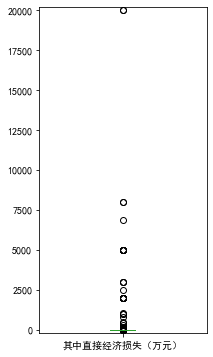

In [32]:
data['其中直接经济损失（万元）'].plot(kind = 'box',figsize = (3,6))

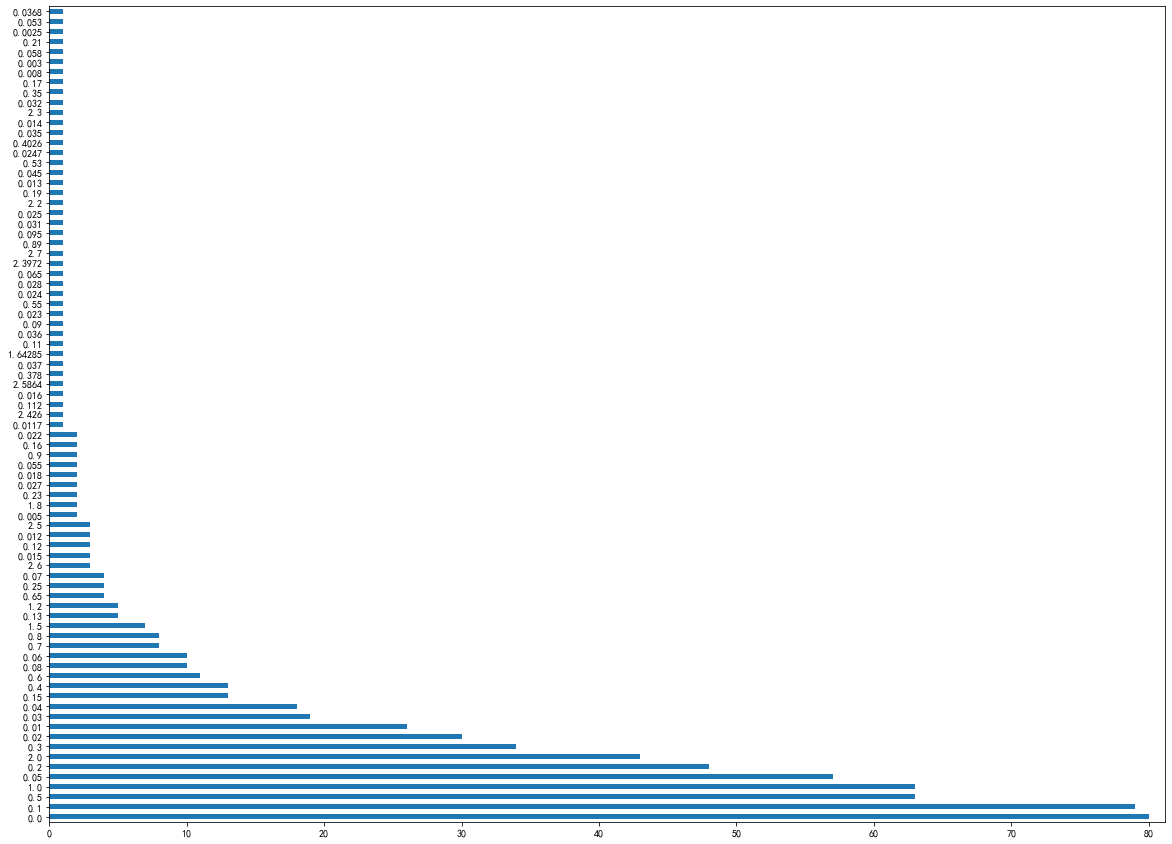

In [33]:
data[data['其中直接经济损失（万元）'] < 3]['其中直接经济损失（万元）'].value_counts().plot(kind = 'barh',figsize = (20,15))

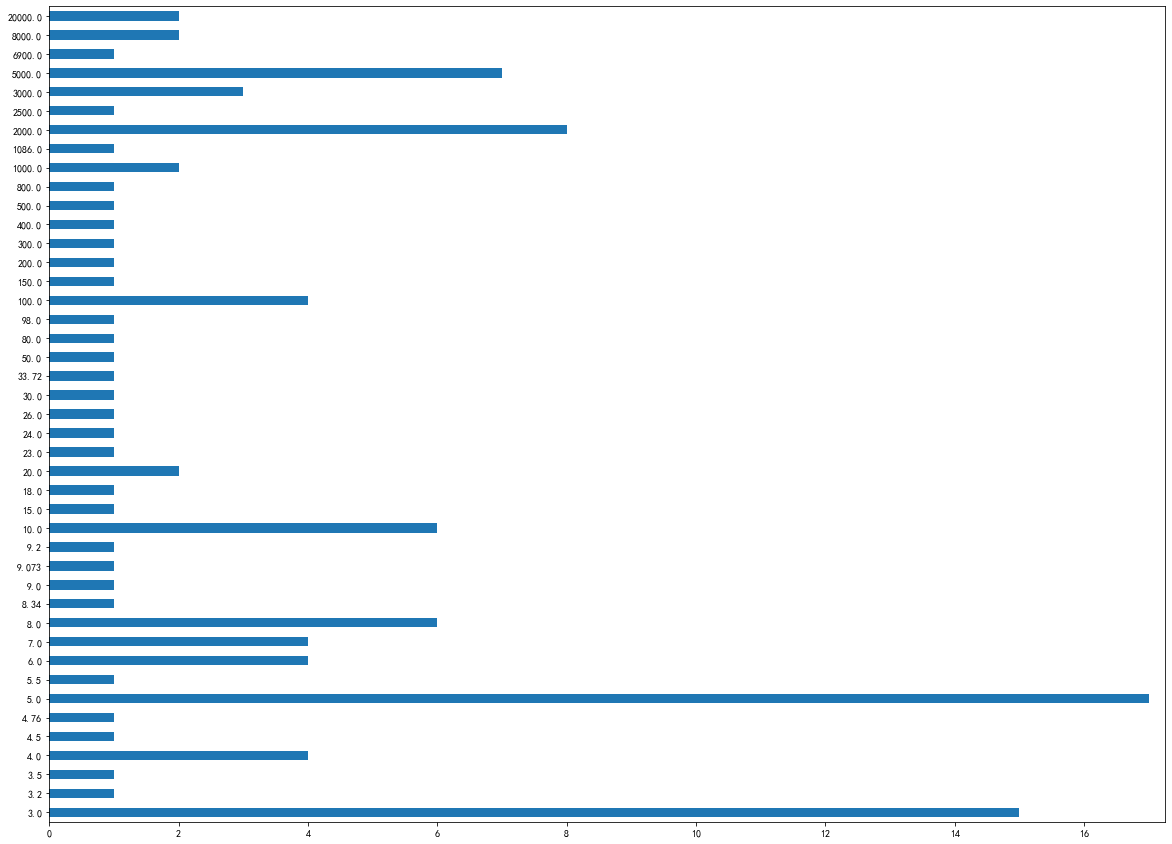

In [34]:
#可以看一下事故经济损失较大的一些案例
data[data['其中直接经济损失（万元）'] >= 3]['其中直接经济损失（万元）'].value_counts().sort_index().plot(kind = 'barh',figsize = (20,15))
#直接经济损失超过1000万元的就是2起事故

2.4.3 经济损失

In [35]:
data['本次事件经济损失（万元）'].value_counts().sort_index()

0.0000        161
0.0020          1
0.0025          1
0.0030          1
0.0050          2
             ... 
5000.0000      10
7000.0000       2
8000.0000       2
10000.0000      1
20000.0000      2
Name: 本次事件经济损失（万元）, Length: 136, dtype: int64

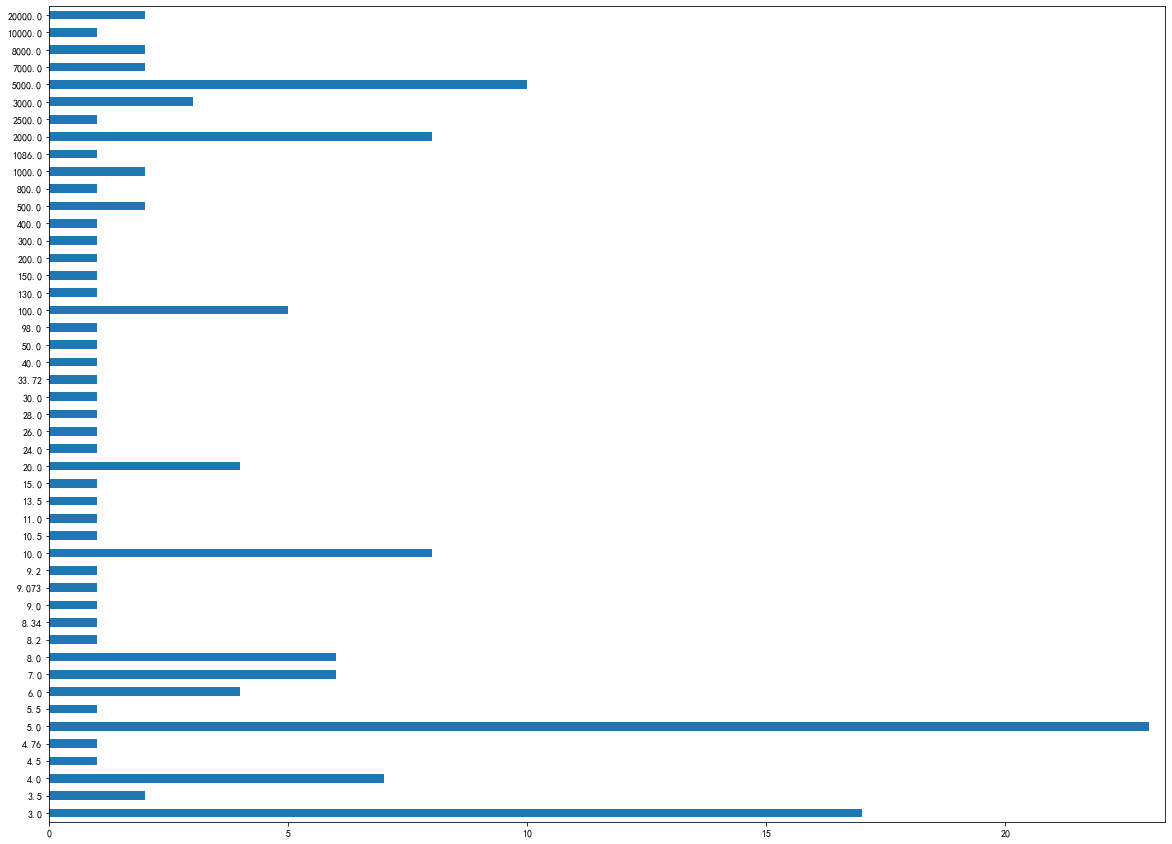

In [36]:
data[data['本次事件经济损失（万元）'] >= 3]['本次事件经济损失（万元）'].value_counts().sort_index().plot(kind = 'barh',figsize = (20,15))
#按照这个算的话在1000万元以上的损失就有3起

2.4.4实际损失工时

In [37]:
loss_job_hour = data['实际损失工时'].value_counts().to_frame().reset_index()
loss_job_hour.columns = ['实际损失工时','次数']

In [38]:
loss_job_hour['实际损失工时'].to_dict()

{0: 0,
 1: 8,
 2: 480,
 3: 24,
 4: 240,
 5: 720,
 6: 4,
 7: 16,
 8: 560,
 9: 56,
 10: 40,
 11: 840,
 12: 80,
 13: 400,
 14: 160,
 15: 800,
 16: 360,
 17: 32,
 18: 1.6,
 19: 640,
 20: 2.4,
 21: 96,
 22: 48,
 23: 6.4,
 24: 440,
 25: 120,
 26: 3.2,
 27: 48000,
 28: 4.8,
 29: 0.8,
 30: 520,
 31: 192,
 32: 320,
 33: 28,
 34: 104,
 35: '4小时',
 36: 336,
 37: 512,
 38: 280,
 39: 2,
 40: 128,
 41: 184,
 42: 7.2,
 43: 1,
 44: 416,
 45: 312,
 46: 632,
 47: 424,
 48: 368,
 49: 2400,
 50: 464,
 51: 200,
 52: 112,
 53: 552,
 54: 8000,
 55: '240h',
 56: 152,
 57: 72000,
 58: 2920,
 59: 3.04,
 60: 544,
 61: 25.6,
 62: 0.64,
 63: 880,
 64: '560小时',
 65: 472,
 66: 304,
 67: '待定',
 68: 2880,
 69: 6,
 70: 176,
 71: 288,
 72: 1440,
 73: 224,
 74: 0.32,
 75: 496,
 76: 5.6,
 77: 44,
 78: 680}

In [39]:
def filter_data(s):
    import re
    if type(s) != str :
        s = s
    elif s == '待定':
        s = 0
    else:
        m = re.sub('小时|h','',s)
        s = float(m)
    return s
loss_job_hour['实际损失工时']  =  loss_job_hour['实际损失工时'] .apply(filter_data)
loss_job_hour
#去除数据之后还是79条

,实际损失工时,次数
0,0.00,125
1,8.00,98
2,480.00,90
3,24.00,69
4,240.00,65
...,...,...
74,0.32,1
75,496.00,1
76,5.60,1
77,44.00,1


In [40]:
loss_job_hour.sort_values(by = '实际损失工时')

,实际损失工时,次数
0,0.00,125
67,0.00,1
74,0.32,1
62,0.64,1
29,0.80,4
...,...,...
68,2880.00,1
58,2920.00,1
54,8000.00,1
27,48000.00,6


In [41]:
print('没有损失工时的事件共:{}起\n损失工时的事件为：{}起'.format(126,loss_job_hour.sort_values(by = '实际损失工时')['次数'][2:].sum()))
#关键词

没有损失工时的事件共:126起
损失工时的事件为：754起


In [42]:
data['实际损失工时'].isnull().sum()

186

In [43]:
126+754+186
#这样加起来刚好是全部的数据量

1066

故最终的损失工时的事件为：754起
没有损失工时的事件共:312起

#### 2.5 事故时间序列特征

2.5.1 每年的事故量

In [44]:
data_time = data[['time','year','month','day','hour','injury_num']]
data_time.head()

,time,year,month,day,hour,injury_num
22,2019-12-27,2019,12,27,11:20,0
23,2019-12-21,2019,12,21,13:15,1
24,2019-12-20,2019,12,20,10:20,0
25,2019-12-19,2019,12,19,16:00,1
26,2019-12-13,2019,12,13,10:05,1


In [45]:
#用于事故计数
def accident_count(df,column_1,column_2):
    df_ = df.groupby(column_1).agg({column_1:'count',column_2:'sum'}) 
    df_['account'] = (df_[column_1] / df_[column_1].sum()).map(lambda x:f'{round(x*100,2)}%')
    return df_

In [46]:
data_year = accident_count(data_time,'year','injury_num')
data_year

,year,injury_num,account
year,,,
2014,244,208,22.89%
2015,246,181,23.08%
2016,125,90,11.73%
2017,134,118,12.57%
2018,160,133,15.01%
2019,157,131,14.73%


In [47]:
print("2014-2019年事故总数：{}".format(data_year.year.sum()))
print("2014-2019年事故人员受伤数量：{}".format(data_year.injury_num.sum()))

2014-2019年事故总数：1066
2014-2019年事故人员受伤数量：861


绘制图形

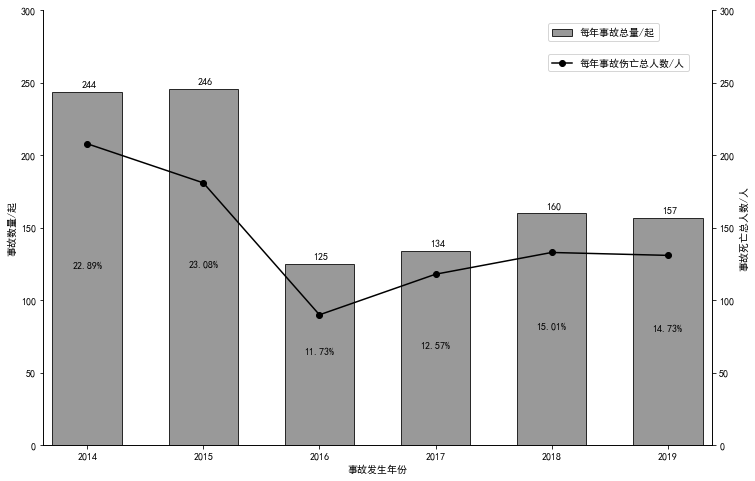

In [48]:
fig,ax = plt.subplots(figsize = (12,8))

ax.set_ylim(0,300)

ax.bar(data_year.index,data_year.year,width=0.6,edgecolor='k',color='gray',alpha = 0.8,label = '每年事故总量/起')
ax.legend(loc=(0.754,0.93))
ax.set_xlabel('事故发生年份')
ax.set_ylabel('事故数量/起')
ax.spines['top'].set_visible(False)

for i,j,k in zip(data_year.index,data_year.year.values,data_year.account.values):
    ax.text(i-0.13,j/2-0.1,k,fontsize = 10)
    ax.text(i-0.05,j+3,"%.0f" %j,fontsize = 10)
    
    
ax1 = ax.twinx()
ax1.spines['top'].set_visible(False)
ax1.set_ylim(0,300)
ax1.plot(data_year.index,data_year.injury_num.values,label = '每年事故伤亡总人数/人',color = 'k',marker ='o')
ax1.legend(loc=(0.754,0.86))
ax1.set_ylabel('事故死亡总人数/人')
plt.savefig(r'C:\Users\86177\Desktop\海工事故\img\1.png',dpi =200)

In [49]:
#为了方便自主出图，设计个算法进行自动去纵轴坐标值
def ceil_up(num):
    '''
    个位数的值小于5的直接取5，大于5的向上取10
    十位数的值个位小于5的直接取5，个位大于5的，十位进1
    百位数的值十位小于5的直接取5，十位大于5的，百位进1
    千位数的值百位小于5的直接取5，百位大于5的，千位进1
    万位数的值千位小于5的直接取5，千位大于5的，万位进1
    '''
    if num < 10:
        if num <= 5:
            num = 5
        else:
            num =10
    elif num<100:
        if int(str(num)[-1]) < 5:
            num = int(str(num)[0])*10 + 5
        else:
            num = (int(str(num)[0]) + 1)*10
    elif num<1000:
        if int(str(num)[-2]) < 5:
            num = int(str(num)[0])*100 + 50
        else:
            num = (int(str(num)[0])+1)*100
    elif num <10000:
        if int(str(num)[-3]) < 5:
            num = int(str(num)[0])*1000 + 500
        else:
            num = (int(str(num)[0])+1)*1000 
    elif num <100000:
        if int(str(num)[-4]) < 5:
            num = int(str(num)[0])*10000 + 5000
        else:
            num = (int(str(num)[0])+1)*10000
    return num

直接将出图的过程封装为函数

In [50]:
def plot_accident_figure(df_time,period,dir_path):
    import os
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['SimHei']

    fig,ax = plt.subplots(figsize = (12,8))
    y1_max_data = df_time.iloc[:,0].max()
    ax.set_ylim(0,ceil_up(y1_max_data))
    ax.set_yticks(range(0,ceil_up(y1_max_data)+1,50))

    ax.bar(df_time.index,df_time.iloc[:,0],width=0.6,edgecolor='k',color='gray',alpha = 0.8,label = f'每{period}事故总量/起')
    ax.legend(loc=(0.754,0.93))
    ax.set_xlabel(f'事故发生{period}')
    ax.set_ylabel('事故数量/起')
    ax.spines['top'].set_visible(False)
    
    if all(type(x)==int for x in df_time.index.tolist()):
        for i,j,k in zip(df_time.index,df_time.iloc[:,0].values,df_time.account.values):
            ax.text(i-0.13,j/2-0.1,k,fontsize = 10)
            ax.text(i-0.05,j+3,"%.0f" %j,fontsize = 10)
    else:
        for i,j,k in zip(range(0,len(df_time.index)),df_time.iloc[:,0].values,df_time.account.values):
            ax.text(i-0.13,j/2-0.1,k,fontsize = 10)
            ax.text(i-0.05,j+3,"%.0f" %j,fontsize = 10)

    
    ax1 = ax.twinx()
    ax1.spines['top'].set_visible(False)
    y2_max_data = df_time.iloc[:,1].max()
    ax1.set_ylim(0,ceil_up(y2_max_data))
    ax1.set_yticks(range(0,ceil_up(y2_max_data)+10,50))
    ax1.plot(df_time.index,df_time.injury_num.values,label = f'每{period}事故伤亡总人数/人',color = 'r',marker ='o')
    ax1.legend(loc=(0.754,0.86))
    ax1.set_ylabel('事故伤亡总人数/人')
    plt.savefig(os.path.join(dir_path,f'每{period}事故统计图.png'),dpi =200)

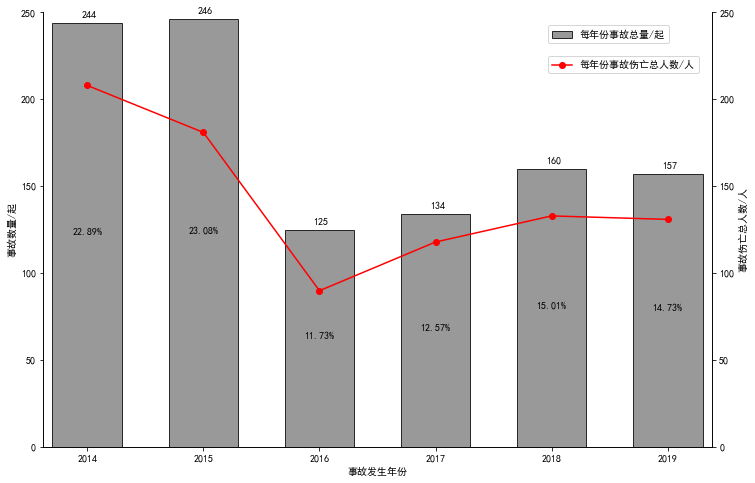

In [51]:
path = r'C:\Users\86177\Desktop\海工事故\img'
plot_accident_figure(data_year,'年份',path)

2.5.2 按季度统计

In [52]:
data_time['season'] = pd.cut(data_time['month'],[0,3,6,9,12],labels=['第一季度','第二季度','第三季度','第四季度'])
data_time.tail()

,time,year,month,day,hour,injury_num,season
1083,2014-01-04,2014,1,4,11:35,1,第一季度
1084,2014-01-03,2014,1,3,10:00,0,第一季度
1085,2014-01-03,2014,1,3,21:20,1,第一季度
1086,2014-01-03,2014,1,3,15:10,1,第一季度
1087,2014-01-01,2014,1,1,11:30,1,第一季度


In [53]:
data_time[data_time.season == '第四季度']

,time,year,month,day,hour,injury_num,season
22,2019-12-27,2019,12,27,11:20,0,第四季度
23,2019-12-21,2019,12,21,13:15,1,第四季度
24,2019-12-20,2019,12,20,10:20,0,第四季度
25,2019-12-19,2019,12,19,16:00,1,第四季度
26,2019-12-13,2019,12,13,10:05,1,第四季度
...,...,...,...,...,...,...,...
920,2014-10-05,2014,10,5,14:15,1,第四季度
921,2014-10-04,2014,10,4,22:00,1,第四季度
922,2014-10-02,2014,10,2,14:00,1,第四季度
923,2014-10-01,2014,10,1,15:50,1,第四季度


In [54]:
data_season = accident_count(data_time,'season','injury_num')
data_season

,season,injury_num,account
season,,,
第一季度,234,164,21.95%
第二季度,310,257,29.08%
第三季度,271,226,25.42%
第四季度,251,214,23.55%


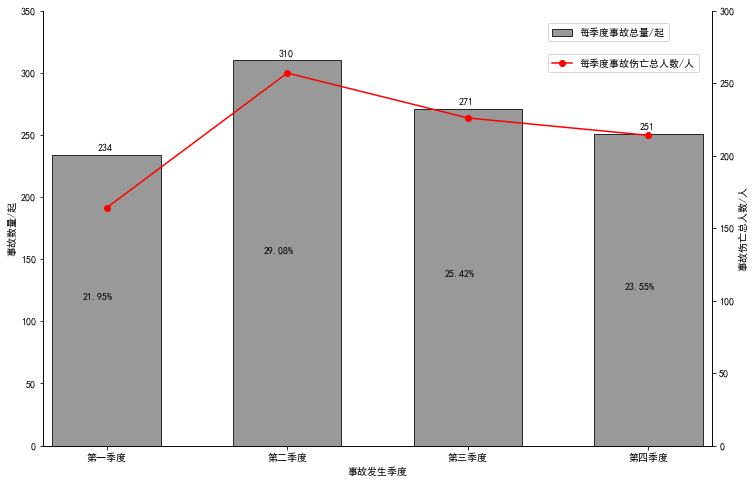

In [55]:
plot_accident_figure(data_season,'季度',path)

2.5.3 按月统计

In [56]:
data_month = accident_count(data_time,'month','injury_num')
data_month

,month,injury_num,account
month,,,
1,91,58,8.54%
2,45,32,4.22%
3,98,74,9.19%
4,106,80,9.94%
5,105,96,9.85%
6,99,81,9.29%
7,89,68,8.35%
8,85,71,7.97%
9,97,87,9.1%


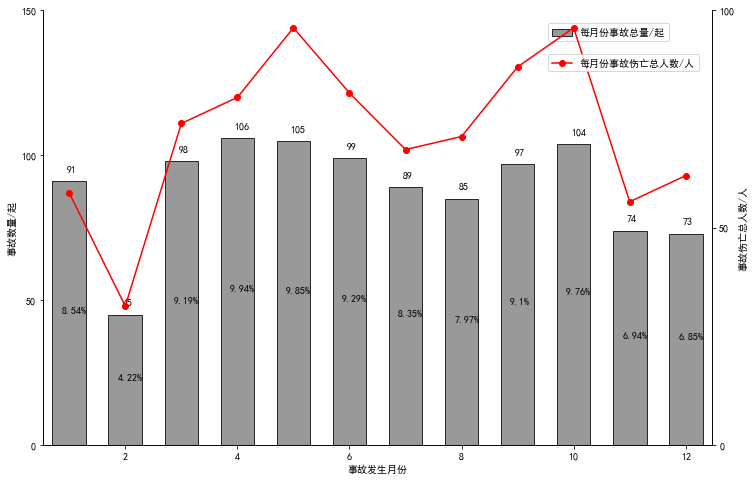

In [57]:
plot_accident_figure(data_month,'月份',path)

2.5.4 按时段统计

In [58]:
data_time['hour'].str[:2].astype(int)

22      11
23      13
24      10
25      16
26      10
        ..
1083    11
1084    10
1085    21
1086    15
1087    11
Name: hour, Length: 1066, dtype: int32

In [59]:
data_time['one_hour'] = pd.cut(data_time['hour'].str[:2].astype(int),list(range(-1,24)),labels=[f'{i}:00-{i+1}:00' for i in range(24)])
data_time

,time,year,month,day,hour,injury_num,season,one_hour
22,2019-12-27,2019,12,27,11:20,0,第四季度,11:00-12:00
23,2019-12-21,2019,12,21,13:15,1,第四季度,13:00-14:00
24,2019-12-20,2019,12,20,10:20,0,第四季度,10:00-11:00
25,2019-12-19,2019,12,19,16:00,1,第四季度,16:00-17:00
26,2019-12-13,2019,12,13,10:05,1,第四季度,10:00-11:00
...,...,...,...,...,...,...,...,...
1083,2014-01-04,2014,1,4,11:35,1,第一季度,11:00-12:00
1084,2014-01-03,2014,1,3,10:00,0,第一季度,10:00-11:00
1085,2014-01-03,2014,1,3,21:20,1,第一季度,21:00-22:00
1086,2014-01-03,2014,1,3,15:10,1,第一季度,15:00-16:00


In [60]:
data_time['two_hour'] = pd.cut(data_time['hour'].str[:2].astype(int),list(range(0,25,2)),labels=[f'{i}:00-{i+2}:00' for i in range(0,24,2)])
data_time

,time,year,month,day,hour,injury_num,season,one_hour,two_hour
22,2019-12-27,2019,12,27,11:20,0,第四季度,11:00-12:00,10:00-12:00
23,2019-12-21,2019,12,21,13:15,1,第四季度,13:00-14:00,12:00-14:00
24,2019-12-20,2019,12,20,10:20,0,第四季度,10:00-11:00,8:00-10:00
25,2019-12-19,2019,12,19,16:00,1,第四季度,16:00-17:00,14:00-16:00
26,2019-12-13,2019,12,13,10:05,1,第四季度,10:00-11:00,8:00-10:00
...,...,...,...,...,...,...,...,...,...
1083,2014-01-04,2014,1,4,11:35,1,第一季度,11:00-12:00,10:00-12:00
1084,2014-01-03,2014,1,3,10:00,0,第一季度,10:00-11:00,8:00-10:00
1085,2014-01-03,2014,1,3,21:20,1,第一季度,21:00-22:00,20:00-22:00
1086,2014-01-03,2014,1,3,15:10,1,第一季度,15:00-16:00,14:00-16:00


a) 如果以两个小时进行统计

In [61]:
data_two_hour = accident_count(data_time,'two_hour','injury_num')
data_two_hour

,two_hour,injury_num,account
two_hour,,,
0:00-2:00,15,9,1.41%
2:00-4:00,11,7,1.04%
4:00-6:00,11,9,1.04%
6:00-8:00,96,73,9.05%
8:00-10:00,235,190,22.15%
10:00-12:00,95,77,8.95%
12:00-14:00,174,151,16.4%
14:00-16:00,205,170,19.32%
16:00-18:00,108,93,10.18%


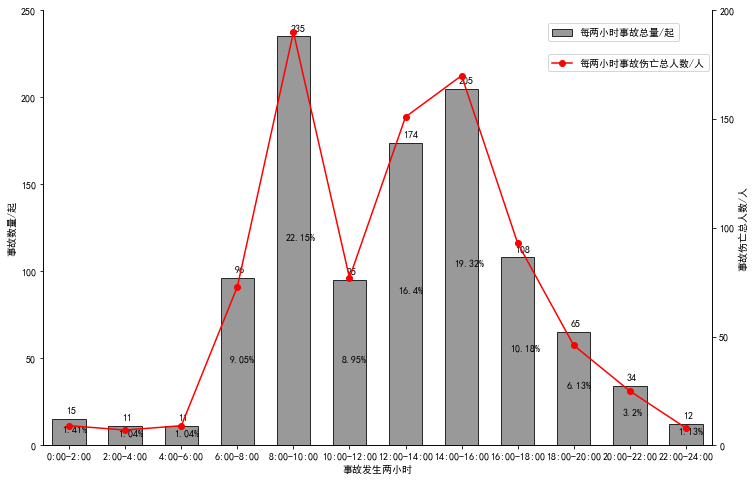

In [62]:
plot_accident_figure(data_two_hour,'两小时',path)

b)如果以一个小时进行统计

In [63]:
data_one_hour = accident_count(data_time,'one_hour','injury_num')
data_one_hour

,one_hour,injury_num,account
one_hour,,,
0:00-1:00,5,3,0.47%
1:00-2:00,4,2,0.38%
2:00-3:00,11,7,1.03%
3:00-4:00,8,6,0.75%
4:00-5:00,3,1,0.28%
5:00-6:00,5,4,0.47%
6:00-7:00,6,5,0.56%
7:00-8:00,21,15,1.97%
8:00-9:00,75,58,7.04%


#### 2.6 业务类型

In [64]:
business_type = data[['业务分类一级','业务分类二级','国标','国际通用标准']]
business_type.head()

,业务分类一级,业务分类二级,国标,国际通用标准
22,常规修理,NaN,无伤害事故no injury accident,财产损失、设备损坏Value (equipment/asset damage or loss)
23,常规修理,NaN,微伤事故Lightly Injury Case,医疗处置事故Medical Treatment Case
24,其他,NaN,无伤害事故no injury accident,未遂事件Near Miss/non conformance
25,常规修理,NaN,无伤害事故no injury accident,未遂事件Near Miss/non conformance
26,常规修理,NaN,微伤事故Lightly Injury Case,医疗处置事故Medical Treatment Case


In [65]:
business_type['业务分类一级'].value_counts().to_frame()

,业务分类一级
其他,306
常规修理,281
船舶建造,261
海工建造,162
海工改装,43
船舶改装,13


In [66]:
business_type['业务分类二级'].value_counts().to_frame()

,业务分类二级
分段制作阶段unit-assembly,155
水下作业阶段launching,139
船台（船坞）合拢阶段erection,95
钢料加工阶段Cutting,31
试航交船阶段Sea trail,7


In [67]:
data_bussibess = business_type.groupby(['业务分类一级','业务分类二级'])[['国标']].count()
data_bussibess.columns = ['事故数量']
data_bussibess
#明明在业务分类一级统计的时候存在海工改装和船舶改装的类别，但是进行汇总的时候却没有了

事故数量
业务分类一级 业务分类二级                   
其他     分段制作阶段unit-assembly     2
       船台（船坞）合拢阶段erection      1
常规修理   钢料加工阶段Cutting           1
海工建造   分段制作阶段unit-assembly    43
       水下作业阶段launching        78
       船台（船坞）合拢阶段erection     31
       试航交船阶段Sea trail         3
       钢料加工阶段Cutting           7
船舶建造   分段制作阶段unit-assembly   110
       水下作业阶段launching        61
       船台（船坞）合拢阶段erection     63
       试航交船阶段Sea trail         4
       钢料加工阶段Cutting          23

In [68]:
business_type[business_type['业务分类一级'] == '海工改装']
#输出发现对于船舶改装没有进行业务分类二级的指标

,业务分类一级,业务分类二级,国标,国际通用标准
95,海工改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
126,海工改装,NaN,微伤事故Lightly Injury Case,损失工作日事故Lost Work Day Case
129,海工改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
149,海工改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
162,海工改装,NaN,微伤事故Lightly Injury Case,医疗处置事故Medical Treatment Case
192,海工改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
193,海工改装,NaN,微伤事故Lightly Injury Case,医疗处置事故Medical Treatment Case
194,海工改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
231,海工改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
264,海工改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case


In [69]:
business_type[business_type['业务分类一级'] == '船舶改装']

,业务分类一级,业务分类二级,国标,国际通用标准
42,船舶改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
92,船舶改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
203,船舶改装,NaN,微伤事故Lightly Injury Case,工作受限事故Restricted Work Day Case
240,船舶改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
354,船舶改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
366,船舶改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
378,船舶改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
420,船舶改装,NaN,微伤事故Lightly Injury Case,损失工作日事故Lost Work Day Case
587,船舶改装,NaN,轻伤事故Minor Injuries Case,损失工作日事故Lost Work Day Case
627,船舶改装,NaN,无伤害事故no injury accident,未遂事件Near Miss/non conformance


In [70]:
data_bussibess_1 = data_bussibess.unstack(level=1,fill_value=0)
data_bussibess_1.columns = [index[1] for index in data_bussibess_1.columns]
data_bussibess_1 

,分段制作阶段unit-assembly,水下作业阶段launching,船台（船坞）合拢阶段erection,试航交船阶段Sea trail,钢料加工阶段Cutting
业务分类一级,,,,,
其他,2,0,1,0,0
常规修理,0,0,0,0,1
海工建造,43,78,31,3,7
船舶建造,110,61,63,4,23


Text(0, 0.5, '业务分类二级')

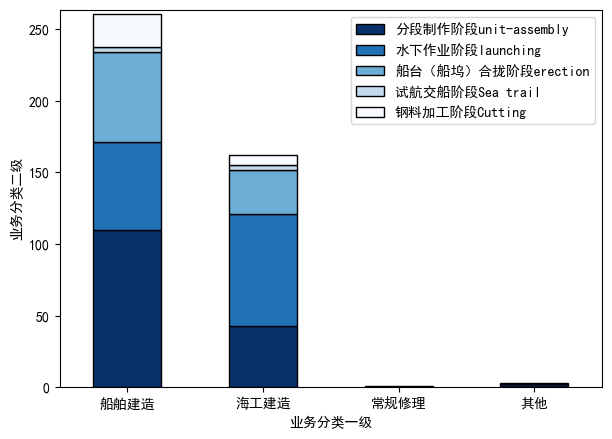

In [71]:
plt.rcParams['figure.dpi'] = 100
data_bussibess_1[::-1].plot(kind = 'bar',stacked = True,colormap='Blues_r',edgecolor = 'k',rot=0,figsize =(7,5))
plt.ylabel('业务分类二级')

In [72]:
business_type['国标'].value_counts().to_frame()

,国标
微伤事故Lightly Injury Case,450
轻伤事故Minor Injuries Case,323
无伤害事故no injury accident,281
死亡事故Fatalities,9
重伤事故Serious Injury Case,3


In [73]:
business_type['国际通用标准'].value_counts().to_frame()

,国际通用标准
损失工作日事故Lost Work Day Case,477
财产损失、设备损坏Value (equipment/asset damage or loss),180
医疗处置事故Medical Treatment Case,158
工作受限事故Restricted Work Day Case,135
未遂事件Near Miss/non conformance,78
急救包扎事件First Aid Cases,22
死亡事故Fatalities,9
环境污染事件Environment impact Case,7


#### 2.7 事件级别

In [74]:
data['事件级别'].value_counts().to_frame()

,事件级别
轻微事件,983
一般事件,80
较大事件,3


#### 2.8 事故类型

In [75]:
data['事件类别'].value_counts().to_frame()

,事件类别
物体打击,335
其它伤害,232
起重伤害,114
高处坠落,85
机械伤害,53
车辆伤害,49
灼烫,35
火灾,28
触电,13
交通事故,12


#### 2.9 作业类型

In [76]:
data['作业类型'].value_counts().to_frame()

,作业类型
其他作业,168
吊运作业lifting/hoisting,117
装配作业assembling,107
搬运作业manual handling,106
攀爬行走climbing and working,84
打磨作业grinding,60
物流运输（叉车forklift、货车truck、电动车electrombile、水路运输water transport）logistic transportation,47
电焊作业welding,38
气割作业gas cutting,28
设备维修equipment maintenance,27


#### 2.10 伤害方式

In [77]:
data[['伤害方式一级', '伤害方式二级', '作业类型', '受伤部位']]

,伤害方式一级,伤害方式二级,作业类型,受伤部位
22,NaN,NaN,NaN,NaN
23,撞击being hitting,落下物,涂装作业painting,颈部 neck|
24,NaN,NaN,NaN,NaN
25,撞击being hitting,飞来物,NaN,NaN
26,碰撞hitting,人撞固定物体,装配作业assembling,腕及手wrist and\n ...
...,...,...,...,...
1083,撞击being hitting,落下物,设备维修equipment maintenance,踝及脚 ankle and\n ...
1084,NaN,NaN,NaN,NaN
1085,碰撞hitting,运动物体撞人,吊运作业lifting/hoisting,颅脑cranium 颅骨 skull|踝及脚 ankle and\n ...
1086,触电electrical shock,NaN,电气作业electrical working,面颌部 face|腕及手wrist and\n ...


In [78]:
data['伤害方式一级'].value_counts().to_frame()

,伤害方式一级
碰撞hitting,299
撞击being hitting,227
其他other,159
坠落falls,93
跌倒trips,78
灼烫scalding,35
火灾fire,25
触电electrical shock,14
倾覆capsize,11
淹溺drowning,5


In [79]:
data['伤害方式二级'].value_counts().to_frame()

,伤害方式二级
落下物,176
运动物体撞人,158
人撞固定物体,95
由高处坠落平地,87
飞来物,51
互撞,46
由平地坠入井、坑洞,6
吸入有毒气体,4
高低温环境,1
皮肤吸收有毒物质,1


In [80]:
data_injury_method = data.groupby(['伤害方式一级','伤害方式二级']).agg({'伤害方式二级':'count'})
data_injury_method.columns = ['事故数量']
data_injury_method
#结果和之前的业务类型等级分类一样，也存在一级指标下面没有二级的

事故数量
伤害方式一级                                           伤害方式二级         
中毒poisoning                                      吸入有毒气体        4
                                                 皮肤吸收有毒物质      1
坠落falls                                          由平地坠入井、坑洞     6
                                                 由高处坠落平地      87
接触contacting with high or low temperature things 高低温物体         1
                                                 高低温环境         1
撞击being hitting                                  落下物         176
                                                 飞来物          51
碰撞hitting                                        互撞           46
                                                 人撞固定物体       95
                                                 运动物体撞人      158

#### 2.11 受伤部位

In [81]:
data['受伤部位'].value_counts().to_frame()
#有空这里可以进行内容的提取
#比如进行常见的受伤部位的汇总

,受伤部位
腕及手wrist and\n hand 指 finger\n|,178
踝及脚 ankle and\n foot 趾 toe|,49
下肢lower\n limbs 小腿 shank|,49
胸部 chest|,45
腰部 waist|,40
...,...
颅脑cranium 脑 brain|颈部 neck|,1
颅脑cranium 颅骨 skull|踝及脚 ankle and\n foot 踝部 ankle|踝及脚 ankle and\n foot 部（距骨、舟骨、骨） |,1
颅脑cranium 颅骨 skull|腕及手wrist and\n hand 腕 wrist|下肢lower\n limbs 小腿 shank|踝及脚 ankle and\n foot 踝部 ankle|,1
|腕及手wrist and\n hand 腕 wrist|,1


In [82]:
#显然直接在这个输出结果上进行数据的清洗，难度太大了，所以直接在原数据上（也就是不进行汇总的数据）清洗
data['受伤部位'].dropna()

23                                               颈部 neck|
26      腕及手wrist and\n                                ...
27      下肢lower\n                                     ...
28      踝及脚 ankle and\n                               ...
30      腕及手wrist and\n                                ...
                              ...                        
1082    踝及脚 ankle and\n                               ...
1083    踝及脚 ankle and\n                               ...
1085    颅脑cranium 颅骨 skull|踝及脚 ankle and\n            ...
1086    面颌部 face|腕及手wrist and\n                       ...
1087    踝及脚 ankle and\n                               ...
Name: 受伤部位, Length: 764, dtype: object

In [83]:
import re

injury_where = []
for item in data['受伤部位'].dropna().values:
    injury_where.extend(re.compile(r'([\u4e00-\u9fa5]+)').findall(item))
injury_where

['颈部',
 '腕及手',
 '指',
 '下肢',
 '小腿',
 '踝及脚',
 '踝部',
 '腕及手',
 '指',
 '踝及脚',
 '跟部',
 '腕及手',
 '指',
 '腕及手',
 '指',
 '脊柱',
 '腕及手',
 '掌',
 '腕及手',
 '指',
 '下肢',
 '小腿',
 '下肢',
 '小腿',
 '胸部',
 '腹部',
 '胸部',
 '颅脑',
 '头皮',
 '上肢',
 '上臂',
 '面颌部',
 '眼部',
 '下肢',
 '膝部',
 '腕及手',
 '腕',
 '下肢',
 '膝部',
 '口',
 '腕及手',
 '指',
 '颅脑',
 '头皮',
 '腕及手',
 '指',
 '腕及手',
 '指',
 '腰部',
 '腕及手',
 '指',
 '腕及手',
 '指',
 '踝及脚',
 '跟部',
 '眼部',
 '踝及脚',
 '部',
 '距骨',
 '舟骨',
 '骨',
 '踝及脚',
 '跟部',
 '腹部',
 '腕及手',
 '指',
 '腕及手',
 '指',
 '腰部',
 '踝及脚',
 '部',
 '距骨',
 '舟骨',
 '骨',
 '眼部',
 '鼻',
 '腰部',
 '胸部',
 '腕及手',
 '指',
 '下肢',
 '膝部',
 '腕及手',
 '指',
 '上肢',
 '肩胛部',
 '下肢',
 '股骨',
 '踝及脚',
 '趾',
 '腕及手',
 '指',
 '下肢',
 '小腿',
 '脊柱',
 '面颌部',
 '踝及脚',
 '跟部',
 '下肢',
 '小腿',
 '踝及脚',
 '踝部',
 '面颌部',
 '胸部',
 '腹部',
 '下肢',
 '膝部',
 '腕及手',
 '指',
 '下肢',
 '股骨',
 '踝及脚',
 '踝部',
 '踝及脚',
 '趾',
 '胸部',
 '眼部',
 '下肢',
 '股骨',
 '下肢',
 '股骨',
 '下肢',
 '髋部',
 '腹部',
 '下肢',
 '膝部',
 '踝及脚',
 '趾',
 '胸部',
 '踝及脚',
 '趾',
 '腕及手',
 '指',
 '面颌部',
 '腕及手',
 '指',
 '下肢',
 '小腿',
 '胸部',
 '腕及手',
 '指',
 '下肢'

In [84]:
pd.Series(injury_where).value_counts()

腕及手    237
指      187
踝及脚    142
下肢     123
上肢      63
胸部      61
小腿      60
趾       55
腰部      45
颅脑      43
面颌部     40
踝部      34
掌       33
骨       32
部       32
舟骨      32
距骨      32
膝部      30
眼部      29
头皮      24
股骨      23
前臂      22
跟部      21
肩胛部     18
腕       17
口       16
腹部      15
鼻       15
上臂      14
脑       11
颈部      10
髋部      10
脊柱      10
肘部       9
颅骨       8
耳        4
dtype: int64

In [85]:
#这个数据就可以很好的知道PPE的开发使用，重点的引导修造工人的安全防护意识

## 多字段对比研究

#### 3.1事故部门（事故地点）、肇事者部门和受伤者部门关联 （三字段对比分析）

In [86]:
data[['事件名称','项目名称','受伤人员涉及班组、施工队', '肇事人员涉及班组、施工队']]
#无用字段

,事件名称,项目名称,受伤人员涉及班组、施工队,肇事人员涉及班组、施工队
22,夏安轮脱硫塔吊运翻身落地,D区2号场地,NaN,起重班
23,物体打击,卑尔根,洪兴队,锦益队
24,内业工场行车维保,NaN,NaN,丰县队
25,修涂工区银河队装载机与300T龙门吊高压配电箱 碰撞,NaN,银河供出砂队,银河供出砂队
26,物体打击,菠萝地海之桥,见航队,见航队
...,...,...,...,...
1083,船体车间代兴富右脚砸伤事件,NaN,海明队,NaN
1084,“顺峰1#”漏油事件,顺峰1#,NaN,外协嘉洋调试
1085,搭载工区员工推挤事故,NaN,管控班组,起重班
1086,触电灼伤事故,NaN,起重设备维修班,资产部


In [87]:
data_division = data[['部门','地点选取', '受伤人员涉及车间、部门',  '肇事人员涉及车间、部门']]

In [88]:
data_division.head()

,部门,地点选取,受伤人员涉及车间、部门,肇事人员涉及车间、部门
22,服务车间,车间,NaN,服务车间
23,涂装工区,船舶,涂装工区,涂装工区
24,分段工区,内场,NaN,分段工区
25,NaN,码头或坞,修涂工区,修涂工区
26,船体工区,内场,船体工区,船体工区


In [89]:
#前面分析了事故类型，多发生在常规修理船舶修造和海工建造中
data_division['部门'].value_counts()[:17].to_frame()
#选取10起事故以上的部门

,部门
船体车间,141
分段工区,93
机电车间,78
涂装车间,58
服务车间,57
机电工区,47
轮机车间,37
船台工区,26
搭载工区,25
舾装车间,20


工区和车间的区别
* 工区：是一般指铁路（或其它企业、厂矿中）企业中最基层的生产管理班组
* 车间：是企业内部组织生产的基本单位，也是企业生产行政管理的一级组织。由若干工段（区）或生产班组构成

In [90]:
data_division['地点选取'].value_counts().to_frame()

,地点选取
内场,349
船舶,299
码头或坞,298
车间,107
厂区外,13


看一下肇事人员部门是否和发生事故的部门一样

In [91]:
data_division_df1 = data_division[['部门','肇事人员涉及车间、部门']]
data_division_df1 = data_division_df1.replace('无',np.nan).dropna()
data_division_df1

,部门,肇事人员涉及车间、部门
22,服务车间,服务车间
23,涂装工区,涂装工区
24,分段工区,分段工区
26,船体工区,船体工区
27,涂装科海陵公司,涂装科
...,...,...
1080,钢加工区,钢加工区
1081,船体车间,船体
1082,船台工区,船台工区
1084,机电车间,机电


In [92]:
#模糊匹配

def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()

    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m

    m2 = df_1['matches'].apply(lambda x: [i[0] for i in x if i[1] >= threshold][0] if len([i[0] for i in x if i[1] >= threshold]) > 0 else '')
    df_1['matches'] = m2

    return df_1
    
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

df_1 = fuzzy_merge(data_division_df1, data_division_df1, '肇事人员涉及车间、部门', '部门', threshold=60)
df_1

,部门,肇事人员涉及车间、部门,matches
22,服务车间,服务车间,服务车间
23,涂装工区,涂装工区,涂装工区
24,分段工区,分段工区,分段工区
26,船体工区,船体工区,船体工区
27,涂装科海陵公司,涂装科,涂装科
...,...,...,...
1080,钢加工区,钢加工区,钢加工区
1081,船体车间,船体,船体工区
1082,船台工区,船台工区,船台工区
1084,机电车间,机电,机电工区


In [93]:
df_1['matches'].value_counts()[-20:]

舾装部机装科          2
资产部             2
生产保障车间、涂装车间     2
机装工区            2
动力部             1
服务工区、制造部        1
工场部             1
质量管理部           1
上海港忆建设工程有限公司    1
基建项目部           1
修涂工区            1
制造二部            1
海工研发中心          1
舾装部             1
服务车间（修）         1
修船事业部           1
总装三部            1
总装二部/汇兴公司       1
船体车间宏业2队        1
制造项目管理部         1
Name: matches, dtype: int64

In [94]:
df_1[df_1['matches'] == '上海港忆建设工程有限公司']

,部门,肇事人员涉及车间、部门,matches
349,上海港忆建设工程有限公司,上海港忆建设工程有限公司,上海港忆建设工程有限公司


In [95]:
df_1[df_1.matches == '']
#无法匹配的就说明肇事人员涉及车间、部门和事故部门不在一起

,部门,肇事人员涉及车间、部门,matches
45,广州市宴汇餐饮管理有限公司,办公室,
172,生产保障部,南通中远重工,
196,艉轴密封部,青岛经济技术开发区海博出租汽车有限公司,
403,轮机车间,天津人和船舶公司,
467,起运车间,王斌,
566,贸易部,租赁方,
818,船队、资产部,南通华波运输公司,
819,服务车间,江苏稳强海洋工程有限公司,
907,资产管理部,江苏格雷特公司,
925,综合工程部,江苏海陆科技公司,


In [96]:
#其中12起是外来人员，不属于公司的部门，还有5起属于肇事人员在非其工作区间造成的事故
#4起是肇事人员内业工区跑至分段工区
len(df_1[df_1.matches == ''])

17

那么再看一下是不是存在着受伤人员和事故部门之间的关系

In [97]:
data_division_df2 = data_division[['部门','受伤人员涉及车间、部门']]
data_division_df2 = data_division_df2.replace('无',np.nan).replace('无人员伤害',np.nan).dropna()
data_division_df2
data_division_df2

,部门,受伤人员涉及车间、部门
23,涂装工区,涂装工区
26,船体工区,船体工区
27,涂装科海陵公司,涂装科
28,机电工区,机电工区
31,机电工区,机电工区
...,...,...
1079,分段工区,内业工区
1080,钢加工区,钢加工区
1082,船台工区,船台工区
1083,船体车间,船体车间


In [98]:
df_2 = fuzzy_merge(data_division_df2, data_division_df2, '受伤人员涉及车间、部门', '部门', threshold=60)
df_2

,部门,受伤人员涉及车间、部门,matches
23,涂装工区,涂装工区,涂装工区
26,船体工区,船体工区,船体工区
27,涂装科海陵公司,涂装科,涂装科
28,机电工区,机电工区,机电工区
31,机电工区,机电工区,机电工区
...,...,...,...
1079,分段工区,内业工区,
1080,钢加工区,钢加工区,钢加工区
1082,船台工区,船台工区,船台工区
1083,船体车间,船体车间,船体车间


In [99]:
df_2[df_2.matches == '']

,部门,受伤人员涉及车间、部门,matches
298,制造部,中远重工,
642,分段工区,内业工区,
723,分段工区,内业工区,
907,资产管理部,启安建筑公司,
925,综合工程部,江苏海陆科技公司,
926,分段工区,内业工区,
927,分段工区,内业工区,
955,基建项目部,江苏启安建设集团有限公司,
961,分段工区,内业工区,
975,分段工区,内业工区,


In [100]:
#也是17起事故其中收到伤害的外来人员为4起，剩余13起都是受伤人员未在起工作区间内发生的
#其中受伤人员最多的是内业工区的人员跑到了分段工区12起
len(df_2[df_2.matches == ''])

17

#### 3.2 肇事人员涉及班组、施工队和受伤人员涉及班组、施工队关联

In [101]:
data['肇事人员涉及班组、施工队'].value_counts().to_frame()[:20]
#可以发现有552条数据，对应着552个施工班组和施工队
#比如新光彩队的事故量最大，那么基于事故发生的几率，是不是还有另一个信息就是说这个施工队的能力很强，可以接到很多活

,肇事人员涉及班组、施工队
新光彩队,26
宁江队,20
起重班,14
宏翔船舶,13
叉车班,11
新光彩船舶,11
苏通队,9
协力队,7
津通队,6
三兴船舶,6


In [102]:
data['受伤人员涉及班组、施工队'].value_counts().to_frame()[:20]

,受伤人员涉及班组、施工队
新光彩队,25
宁江队,19
协力队,15
宏翔船舶,13
新光彩船舶,11
维修班,9
津通队,8
起重班,8
苏通队,7
三兴船舶,6


如果是公司业务的话，可以对比分析一下这两份数据

#### 3.3 责任事件与作业许可项目关联

In [103]:
data_1 = data.groupby(['是否作业许可项目','是否责任事件']).agg({'是否责任事件':'count'})
data_1.columns = ['事故数量']
data_1

事故数量
是否作业许可项目 是否责任事件      
危险作业审批项  意外事件      71
         责任事件     149
非审批项     意外事件     218
         责任事件     628

In [104]:
data_1['事故数量'].sum()

1066

In [105]:
218/(218+628)

0.2576832151300236

In [106]:
628/(218+628)

0.7423167848699763

In [107]:
71/(71+149)

0.32272727272727275

In [108]:
149/(71+149)

0.6772727272727272

In [109]:
data_1.swaplevel(0,1).sort_index(level = 0)
#和下面的是一样的，还是一行代码可以解决的事情

事故数量
是否责任事件 是否作业许可项目      
意外事件   危险作业审批项     71
       非审批项       218
责任事件   危险作业审批项    149
       非审批项       628

In [110]:
data_2 = data.groupby(['是否责任事件','是否作业许可项目']).agg({'是否责任事件':'count'})
data_2.columns = ['事故数量']
data_2

事故数量
是否责任事件 是否作业许可项目      
意外事件   危险作业审批项     71
       非审批项       218
责任事件   危险作业审批项    149
       非审批项       628

① 统计的1066起事故中， 危险作业审批项为
220起，未审批项为846起；

② 非审批项中，发生的意外事故为218起（占比25.77%），责任事故628起（74.23%）

③ 危险作业审批项中，意外事故71起（占比32.27%），责任事故149起（占比67.73%）

④ 经过危险作业审批后，责任事故发生的起数明显降低，事故占比下降7%左右

#### 3.4 肇事人员和受伤人员对比研究

3.4.1 肇事人员单人造成事故、多人造成事故、受伤单人事故和受伤多人事故

In [111]:
#关于受伤人员的信息，前面已经求解过了，肇事人员内容的处理方式也类似
data_wrecker =data['肇事人工种'].value_counts().to_frame()
data_wrecker
#可以看出这个多人的事故要比受伤人员的事故要多

,肇事人工种
装配工,175
辅助工,108
电焊工,72
管理人员,66
打磨工,58
钳工,55
起重作业指挥,53
车辆司机,52
管工,51
其他工种,49


In [112]:
#肇事人员为多人的事故有：36起
data_wrecker[data_wrecker.index.str.contains(',')].sum()

肇事人工种    36
dtype: int64

In [113]:
#肇事人员为单人的事故有：965起
data_wrecker[~data_wrecker.index.str.contains(',')].sum()

肇事人工种    965
dtype: int64

In [114]:
#还有环境等非人为操作时失误的自然事故：65起
data_wrecker.values.sum()

1001

In [115]:
data['wrecker_num'] = data['肇事人工种'].apply(acc_injury)

In [116]:
data[data['wrecker_num']>1][['time','year','month','day','hour','wrecker_num','injury_num']]

,time,year,month,day,hour,wrecker_num,injury_num
55,2019-09-19,2019,9,19,04:30,2,0
105,2019-06-11,2019,6,11,02:30,2,0
153,2019-03-28,2019,3,28,19:30,2,0
165,2019-02-25,2019,2,25,08:50,2,1
189,2018-12-15,2018,12,15,16:10,2,0
202,2018-11-22,2018,11,22,17:20,2,0
233,2018-09-10,2018,9,10,16:20,2,0
263,2018-06-16,2018,6,16,03:30,2,0
268,2018-06-08,2018,6,8,17:00,2,2
277,2018-05-24,2018,5,24,05:40,2,2


In [117]:
zero_people_wrecker = len(data) - data_wrecker.values.sum()
one_people_wrecker = len(data[data ['wrecker_num']==1])
two_people_wrecker = len(data[data ['wrecker_num']==2])
three_people_wrecker = len(data[data ['wrecker_num']==3])
print(f'综上可知：\n\n\
0人肇事：{zero_people_wrecker}起\n\
1人肇事事故：{one_people_wrecker}起\n\
2人肇事事故：{two_people_wrecker}起\n\
3人肇事事故：{three_people_wrecker}起')

综上可知：

0人肇事：65起
1人肇事事故：1030起
2人肇事事故：31起
3人肇事事故：5起


In [118]:
print(f'综上可知：\n\n2014年-2019年统计数据:{accident_num}起\n\
0人伤亡：{zero_people_injury}起\n\
1人伤亡事故：{one_people_injury}起\n\
2人伤亡事故：{two_people_injury}起\n\
3人伤亡事故：{three_people_injury}起\n\n\
总伤亡{total_prople_injury}人')

综上可知：

2014年-2019年统计数据:1066起
0人伤亡：215起
1人伤亡事故：842起
2人伤亡事故：8起
3人伤亡事故：1起

总伤亡861人


3.4.2肇事人员和受伤人员性别、婚姻状况、年龄、文化程度比例

In [119]:
data_people = data[['受伤人员性别', '受伤人员婚姻状况','受伤人员年龄','受伤人员文化程度', '肇事人性别', '肇事人婚姻状况', '肇事人年龄','肇事人文化程度']]
data_people

,受伤人员性别,受伤人员婚姻状况,受伤人员年龄,受伤人员文化程度,肇事人性别,肇事人婚姻状况,肇事人年龄,肇事人文化程度
22,NaN,NaN,NaN,NaN,男,NaN,47,初中
23,男,已婚,49,初中,男,已婚,47,初中
24,NaN,NaN,NaN,NaN,女,NaN,30,高中、职专、中技
25,男,NaN,56,初中,男,NaN,56,NaN
26,男,已婚,25,初中,男,已婚,25,初中
...,...,...,...,...,...,...,...,...
1083,男,已婚,51,初中,NaN,NaN,NaN,NaN
1084,NaN,NaN,NaN,NaN,男,已婚,28,大学本科及以上
1085,男,NaN,38,初中,男,已婚,38,高中、职专、中技
1086,男,已婚,45,高中、职专、中技,男,已婚,32,大学本科及以上


男女比例

In [120]:
# data_people['受伤人员性别'] = data_people['受伤人员性别'].apply(acc_injury)
injury_gender = data_people['受伤人员性别'].value_counts().to_frame().reset_index()
injury_gender

,index,受伤人员性别
0,男,791
1,女,52
2,"男,男",6
3,"女,男,女",1
4,"男,女",1


In [121]:
injury_gender['index'] = injury_gender['index'].apply(lambda x: x.split(','))
injury_gender

,index,受伤人员性别
0,[男],791
1,[女],52
2,"[男, 男]",6
3,"[女, 男, 女]",1
4,"[男, 女]",1


In [122]:
injury_gender.explode('index')

,index,受伤人员性别
0,男,791
1,女,52
2,男,6
2,男,6
3,女,1
3,男,1
3,女,1
4,男,1
4,女,1


In [123]:
injury_gender.explode('index').groupby('index').sum()

,受伤人员性别
index,
女,55
男,805


把上面的过程进行封装一下

In [124]:
def explode_acc(df_col):
    df = df_col.value_counts().to_frame().reset_index()
    
    df['index'] = df['index'].apply(lambda x: x.split(',') if type(x) == str else str(x))
    df = df.explode('index').groupby('index').sum()
    return df

In [125]:
#同理进行肇事人员的性别查看
explode_acc(data_people['肇事人性别'])

,肇事人性别
index,
女,66
男,981


In [126]:
explode_acc(data_people['受伤人员婚姻状况'])

,受伤人员婚姻状况
index,
已婚,648
未婚,108


In [127]:
explode_acc(data_people['肇事人婚姻状况'])

,肇事人婚姻状况
index,
已婚,788
未婚,120


In [128]:
explode_acc(data_people['受伤人员年龄'])

,受伤人员年龄
index,
19,2
20,10
21,11
22,10
23,13
24,12
25,25
26,22
27,25


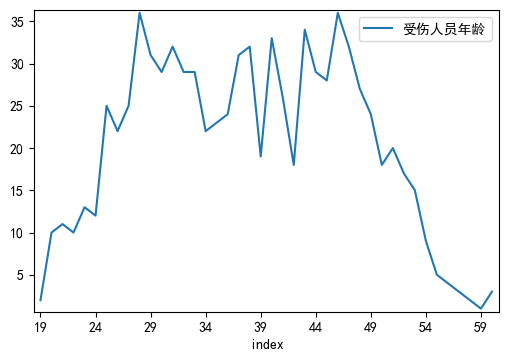

In [129]:
explode_acc(data_people['受伤人员年龄']).plot()

In [130]:
explode_acc(data_people['肇事人年龄'])
#这里的异常值和需要处理的有点多呀，有空再整吧

,肇事人年龄
index,
-419,1
-449,1
-587,2
117,1
19,2
1976,1
20,8
21,11
22,19


In [131]:
explode_acc(data_people['受伤人员文化程度'])

,受伤人员文化程度
index,
初中,594
大学专科,38
大学本科及以上,18
小学,43
高中、职专、中技,170


In [132]:
explode_acc(data_people['肇事人文化程度'])

,肇事人文化程度
index,
初中,682
大学专科,57
大学本科及以上,25
小学,46
高中、职专、中技,222


3.4.3 肇事人工种、肇事人用工形式、肇事人本工种工龄、受伤人员工种、受伤人员本工种工龄、受伤人员用工形式

In [133]:
data_occ = data[[ '受伤人员工种', '受伤人员用工形式','肇事人工种', 
                 '肇事人用工形式','触犯公司红线','触犯工种红线',
                 '受伤人员是否为新工人', '受伤人员如新工人有无船厂工作经验',
                '肇事人是否为新工人', '肇事人如新工人有无船厂工作经验']]
data_occ

,受伤人员工种,受伤人员用工形式,肇事人工种,肇事人用工形式,触犯公司红线,触犯工种红线,受伤人员是否为新工人,受伤人员如新工人有无船厂工作经验,肇事人是否为新工人,肇事人如新工人有无船厂工作经验
22,0,NaN,起重作业指挥,劳务制,NaN,NaN,NaN,NaN,老工人,NaN
23,油漆工,外包制,打磨工,外包制,NaN,NaN,新工人,有,老工人,NaN
24,0,NaN,起重司机,外包制,NaN,NaN,NaN,NaN,新工人,有
25,其他工种,外包制,其他工种,外包制,NaN,NaN,老工人,NaN,老工人,NaN
26,装配工,外包制,装配工,外包制,NaN,NaN,老工人,NaN,老工人,NaN
...,...,...,...,...,...,...,...,...,...,...
1083,设备维修工,外包制,NaN,NaN,NaN,NaN,老工人,NaN,NaN,NaN
1084,0,NaN,调试人员,外包制,NaN,NaN,NaN,NaN,老工人,NaN
1085,装配工,外包制,起重作业指挥,劳务制,NaN,NaN,老工人,NaN,新工人,有
1086,电工,协力制,管理人员,合同制,NaN,NaN,老工人,NaN,老工人,NaN


In [134]:
wrecker_job_forms = []
for i in data_occ['肇事人工种'].dropna():
    wrecker_job_forms.extend(i.split(','))
wrecker_job_forms

['起重作业指挥',
 '打磨工',
 '起重司机',
 '其他工种',
 '装配工',
 '油漆工',
 '管工',
 '钳工',
 '调试人员',
 '辅助工',
 '管工',
 '司索',
 '打磨工',
 '打磨工',
 '司索',
 '管工',
 '装配工',
 '电焊工',
 '油漆工',
 '其他工种',
 '起重作业指挥',
 '辅助工',
 '装配工',
 '其他工种',
 '装配工',
 '辅助工',
 '其他工种',
 '打磨工',
 '其他工种',
 '电焊工',
 '打磨工',
 '架子工',
 '起重作业指挥',
 '电焊工',
 '管工',
 '装配工',
 '装配工',
 '起重作业指挥',
 '打砂工',
 '打砂工',
 '起重作业指挥',
 '起重作业指挥',
 '管理人员',
 '电焊工',
 '装配工',
 '辅助工',
 '打磨工',
 '装配工',
 '装配工',
 '电焊工',
 '装配工',
 '装配工',
 '电工',
 '钳工',
 '辅助工',
 '管理人员',
 '辅助工',
 '辅助工',
 '其他工种',
 '架子工',
 '管工',
 '辅助工',
 '装配工',
 '架子工',
 '清油工',
 '起重作业指挥',
 '电焊工',
 '车辆司机',
 '车辆司机',
 '钳工',
 '辅助工',
 '辅助工',
 '辅助工',
 '打磨工',
 '钳工',
 '架子工',
 '车辆司机',
 '司索',
 '装配工',
 '其他工种',
 '管理人员',
 '辅助工',
 '打磨工',
 '其他工种',
 '其他工种',
 '车辆司机',
 '打砂工',
 '装配工',
 '起重司机',
 '机加工',
 '其他工种',
 '装配工',
 '其他工种',
 '油漆工',
 '装配工',
 '装配工',
 '油漆工',
 '装配工',
 '钳工',
 '装配工',
 '其他工种',
 '管工',
 '打磨工',
 '装配工',
 '其他工种',
 '其他工种',
 '打砂工',
 '班组长',
 '班组长',
 '辅助工',
 '其他工种',
 '班组长',
 '架子工',
 '起重作业指挥',
 '装配工',
 '打磨工',
 '起重司机',
 '装配工',
 '电焊工',
 '起重司机',
 '起重

In [135]:
pd.Series(wrecker_job_forms).value_counts().to_frame()

,0
装配工,180
辅助工,111
电焊工,74
管理人员,71
起重作业指挥,66
打磨工,60
管工,58
钳工,57
其他工种,57
车辆司机,53


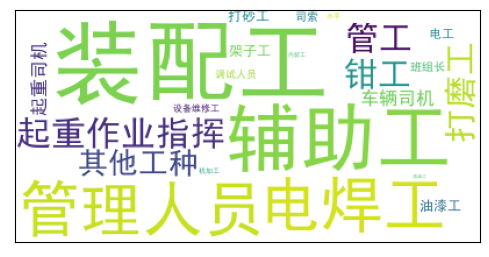

In [136]:
filter_data = pd.Series(wrecker_job_forms).value_counts()[:-1].to_frame().reset_index()
from wordcloud import WordCloud

wordcloud=WordCloud(font_path=r"C:\Users\86177\Desktop\海工事故\simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in filter_data.values}
wordcloud=wordcloud.fit_words(word_frequence)

plt.rcParams['figure.dpi'] = 100
plt.tick_params(color = 'w')
plt.xticks([])
plt.yticks([])
plt.imshow(wordcloud)

In [137]:
data_job_type = data[['肇事人用工形式','肇事人工种','肇事人本工种工龄']].dropna()

In [138]:
explode_acc(data_job_type['肇事人用工形式'])

,肇事人用工形式
index,
劳务制,100
协力制,174
合同制,144
外包制,518
外协制,30


In [139]:
ls_employment_forms = []
for i in data['肇事人用工形式'].dropna():
    ls_employment_forms.extend(i.split(','))
np.unique(ls_employment_forms)

array(['劳务制', '协力制', '合同制', '外包制', '外协制'], dtype='<U3')

In [140]:
pd.Series(ls_employment_forms).value_counts().to_frame()
#跟上面的方法还是有差别的，回来继续研究一下，差异出现在哪里

,0
外包制,560
协力制,192
合同制,151
劳务制,109
外协制,35


In [141]:
data_job_type.head()

,肇事人用工形式,肇事人工种,肇事人本工种工龄
22,劳务制,起重作业指挥,11
23,外包制,打磨工,6
26,外包制,装配工,2
27,外包制,油漆工,3
28,外包制,管工,8


In [142]:
data_job_type.groupby(['肇事人工种','肇事人用工形式']).sum()

肇事人本工种工龄
肇事人工种   肇事人用工形式         
其他工种    劳务制           23
        协力制           31
        合同制           82
        外包制          108
        外协制           46
...                  ...
钳工      协力制           41
        合同制           70
        外包制          254
钳工,管理人员 外包制,合同制    10,18
        外包制,外包制      2,6

[125 rows x 1 columns]

In [143]:
data_job_type.groupby(['肇事人用工形式','肇事人工种']).sum()

肇事人本工种工龄
肇事人用工形式 肇事人工种             
劳务制     其他工种            23
        司索              64
        带缆工              1
        打砂工             11
        打磨工              1
...                    ...
外协制     调试人员            22
        起重作业指挥          19
        起重司机             6
        车辆司机            11
外协制,外包制 调试人员,调试人员        1

[125 rows x 1 columns]

In [144]:
ls_employment_years = []
for i in data['肇事人本工种工龄'].dropna():
    ls_employment_years.extend(str(i).split(','))
ls_employment_years

['11',
 '6',
 '2',
 '3',
 '8',
 '9',
 '1',
 '8',
 '10',
 '9',
 '3',
 '1',
 '2',
 '9',
 '6',
 '7',
 '1',
 '2',
 '14',
 '1',
 '4',
 '2',
 '3',
 '1',
 '3',
 '2',
 '4',
 '15',
 '3',
 '13',
 '10',
 '1',
 '5',
 '2',
 '2',
 '2',
 '2',
 '11',
 '5',
 '20',
 '5',
 '20',
 '5',
 '14',
 '2',
 '12',
 '2',
 '10',
 '13',
 '12',
 '4',
 '1',
 '9',
 '2',
 '2',
 '14',
 '4',
 '1',
 '9',
 '3',
 '4',
 '10',
 '10',
 '2',
 '5',
 '2',
 '6',
 '8',
 '1',
 '1',
 '8',
 '3',
 '2',
 '9',
 '4',
 '28',
 '2',
 '1',
 '1',
 '3',
 '11',
 '9',
 '13',
 '7',
 '1',
 '2',
 '1',
 '11',
 '3',
 '2',
 '2',
 '10',
 '3',
 '13',
 '8',
 '10',
 '3',
 '9',
 '1',
 '17',
 '3',
 '2',
 '1',
 '23',
 '16',
 '2',
 '1',
 '11',
 '2',
 '10',
 '2',
 '8',
 '13',
 '5',
 '6',
 '12',
 '3',
 '20',
 '12',
 '3',
 '1',
 '1',
 '6',
 '10',
 '29',
 '2',
 '6',
 '10',
 '2',
 '5',
 '10',
 '9',
 '9',
 '12',
 '8',
 '8',
 '13',
 '12',
 '12',
 '2',
 '1',
 '10',
 '11',
 '15',
 '5',
 '25',
 '10',
 '1',
 '1',
 '11',
 '5',
 '4',
 '5',
 '10',
 '12',
 '14',
 '20',
 '6',
 

In [145]:
age_job = pd.Series(ls_employment_years,dtype=int)
age_job.value_counts().sort_index()
# age_job.value_counts().sort_index().to_frame()
#最多的本工种工龄是30年，老鸟也会犯错
#如果说5年页上的就算是老手了，那么进行5年工龄以上和5年工龄以上的统计对比

1     134
2     110
3      92
4      56
5      78
6      69
7      48
8      88
9      46
10     81
11     25
12     31
13     20
14     17
15     12
16      8
17     10
18     10
19      6
20     12
21      4
22      1
23      1
24      3
25      2
26      1
28      3
29      1
30      1
dtype: int64

In [146]:
age_job.value_counts().sort_index()[:5].sum()

470

In [147]:
age_job.value_counts().sort_index()[5:].sum()
#事实上证明本工种超过5年的工作人员发生事故的概率要比本工种在5年之内的事故概率要高

500

In [148]:
len(ls_employment_forms),len(wrecker_job_forms),len(ls_employment_years)
#证明是存在录入错误的操作，存在人为录入失误

#这里也是再一次证明在统计事故数据时候，人员的身份信息最容易统计的就是工种信息
#这里的用工形式和本工种年龄都需要去系统中再查找一下

(1047, 1042, 970)

In [149]:
#看一下受伤人员本工种工龄
ls_injury_years = []
for i in data['受伤人员本工种工龄'].dropna():
    ls_injury_years.extend(str(i).split(','))
ls_injury_years

['3',
 '4',
 '2',
 '3',
 '8',
 '1',
 '8',
 '10',
 '9',
 '3',
 '1',
 '2',
 '9',
 '6',
 '7',
 '1',
 '3',
 '7',
 '1',
 '4',
 '3',
 '1',
 '4',
 '2',
 '15',
 '3',
 '13',
 '10',
 '2',
 '2',
 '2',
 '11',
 '5',
 '5',
 '20',
 '5',
 '15',
 '2',
 '12',
 '2',
 '10',
 '1',
 '12',
 '1',
 '9',
 '2',
 '2',
 '3',
 '4',
 '1',
 '1',
 '3',
 '6',
 '8',
 '4',
 '10',
 '2',
 '4',
 '8',
 '1',
 '1',
 '8',
 '3',
 '9',
 '1',
 '1',
 '1',
 '13',
 '1',
 '2',
 '1',
 '20',
 '3',
 '2',
 '10',
 '3',
 '13',
 '8',
 '11',
 '3',
 '9',
 '1',
 '3',
 '2',
 '1',
 '23',
 '16',
 '2',
 '1',
 '1',
 '2',
 '10',
 '8',
 '13',
 '2',
 '8',
 '12',
 '3',
 '20',
 '3',
 '1',
 '1',
 '6',
 '10',
 '29',
 '2',
 '1',
 '10',
 '9',
 '12',
 '10',
 '8',
 '13',
 '5',
 '2',
 '14',
 '10',
 '15',
 '5',
 '3',
 '1',
 '1',
 '11',
 '5',
 '4',
 '10',
 '12',
 '14',
 '20',
 '6',
 '9',
 '1',
 '5',
 '8',
 '13',
 '5',
 '12',
 '6',
 '3',
 '15',
 '6',
 '7',
 '23',
 '18',
 '10',
 '10',
 '1',
 '8',
 '9',
 '14',
 '3',
 '2',
 '10',
 '11',
 '1',
 '15',
 '12',
 '1',
 '5'

In [150]:
age_job = pd.Series(ls_injury_years,dtype=int)
age_job.value_counts().sort_index()

1     118
2     107
3      82
4      49
5      69
6      47
7      45
8      64
9      34
10     61
11     13
12     25
13     15
14      8
15      8
16      6
17      6
18      4
19      6
20     10
21      2
22      1
23      2
24      3
28      1
29      1
30      1
31      1
dtype: int64

In [151]:
age_job.value_counts().sort_index()[:5].sum()

425

In [152]:
age_job.value_counts().sort_index()[5:].sum()
#事实证明受到伤害的工作人员中，工作5年以上的人数要比五年以内的人数要少，说明老鸟比菜鸟更懂得保护自己不受伤害（强烈的肌肉和大脑记忆）

364

3.4.4 肇事者和受伤者是否为新人、有无船厂工作经验、入职和受教育时间

In [153]:
data_new_worker = data[['肇事人是否为新工人','肇事人如新工人有无船厂工作经验','受伤人员是否为新工人', '受伤人员如新工人有无船厂工作经验','肇事人入职时间', '肇事人接受教育时间','受伤人员入职时间', '受伤人员接受教育时间']]
data_new_worker

,肇事人是否为新工人,肇事人如新工人有无船厂工作经验,受伤人员是否为新工人,受伤人员如新工人有无船厂工作经验,肇事人入职时间,肇事人接受教育时间,受伤人员入职时间,受伤人员接受教育时间
22,老工人,NaN,NaN,NaN,2008-12-15,2008-12-15,NaN,NaN
23,老工人,NaN,新工人,有,2018-02-22,2018-02-19,2019-09-09,2019-09-04
24,新工人,有,NaN,NaN,2019-10-18,2019-10-18,NaN,NaN
25,老工人,NaN,老工人,NaN,2015-03-31,2015-03-31,2015-03-31,2015-03-31
26,老工人,NaN,老工人,NaN,2018-07-12,2018-07-10,2018-07-12,2018-07-10
...,...,...,...,...,...,...,...,...
1083,NaN,NaN,老工人,NaN,NaN,NaN,2003-03-04,2003-03-04
1084,老工人,NaN,NaN,NaN,2010-09-27,2010-09-27,NaN,NaN
1085,新工人,有,老工人,NaN,2018-08-19,2018-08-18,2013-04-22,2013-04-21
1086,老工人,NaN,老工人,NaN,2010-08-10,2010-08-09,2005-07-05,2005-07-04


In [154]:
explode_acc(data_new_worker['肇事人是否为新工人'])

,肇事人是否为新工人
index,
新工人,195
老工人,791


In [155]:
explode_acc(data_new_worker['肇事人如新工人有无船厂工作经验'])

,肇事人如新工人有无船厂工作经验
index,
无,56
有,92


In [ ]:
#可以看出新工人的占比，然后进一步的查看新工人有无在船厂工作的占比情况